# Seattle Traffic Accident Severity Prediction (Week 3)
## 1. Introduction
### 1.1 Background
Traffic accidents have risen to the 3rd main reason for mortality among countries by 2020, which also hurts the economy society. Citizens feel a lack of security when they drive on roads, cross streets, or even walk along pavements. Vehicle manufacturers have invested a large number of professionals and funds in improving the quality of vehicles, but all these efforts have less contribution to traffic rushes. It is time for the government to take some action to find out the leading causes of traffic accidents.
## 1.2 Business Problem
The purpose of this project is to analyze the collision dataset for the city of Seattle and find patterns and determinate the key factors such as weather, light and road conditions, drug or alcohol influence, driver inattention to provide the best traffic accident severity prediction. It will use various analytical techniques and machine learning classification algorithms such as k-nearest-neighbors, decision tree analysis, support vector machine, logistic regression, etc.
## 1.3 Target Audience
This study can mainly help transportation governments improve traffic policies or update public facilities such as street lamps, speed bumps at proper positions. Car rental or insurance companies are also among the target groups of this analysis because they can classify potential customers and design different service content based on customers driving habits.

## 2. Data
### 2.1 Data Source
Seattle Department of Transportation provides traffic accident cases for almost 15 years to discover the reasons behind these collisions. The dataset contains all kinds of collisions in Seattle from 2004 to 2020. The full dataset can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv).The metadata can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf).

To predict the damage level of road accidents, the indicator 'SEVERITYCODE' is chosen as the dependent variable. The degree of collision climbs up from property damage only collision to an injury collision. Among dozens of attributes, this project concentrates on both nature and human factors of car accidents. Nature factors are made up of 'ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', and 'LIGHTCOND' which represents location, contact parts, weather, road, and view circumstances respectively. On the other hand, human factors usually reflect the status of drivers such as 'INCDTTM', 'INATTENTIONIND', 'UNDERINFL', and 'SPEEDING', which shows the time of accidents, the concentration of drivers mind, drug or alcohol influence, and the speeding driving. All attributes involved in this project are shown below .

| Attribute |Data type, length| Description |
| :--- | :--- | :--- |
| ADDRTYPE | Text,1 | A description of the address type of the collision.
| COLLISIONTYPE | Text,300 | A description of the collision type.
| WEATHER | Text,300 | A description of the weather conditions during the time of the collision.
| ROADCOND | Text,300 | The condition of the road during the collision.
| LIGHTCOND | Text,300 | The light conditions during the collision.
| INCDTTM | Text,30 | The date and time of the incident.
| INATTENTIONIND | Text,1 | Whether or not collision was due to inattention.(Y/N)
| UNDERINFL | Text,10 | Whether or not a driver involved was under the influence of drugs or alcohol.
| SPEEDING | Text,1 | Whether or not speeding was a factor in the collision.(Y/N)

## 2.2 Display the data
Load the raw dataset.

In [1]:
#!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

In [28]:
import pandas as pd
raw_data = pd.read_csv('./input/Data-Collisions.csv',index_col='INCKEY',parse_dates=['INCDATE','INCDTTM'])
raw_data.head()


C:\Users\IVY\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE           X          Y  OBJECTID  COLDETKEY REPORTNO  \
INCKEY                                                                      
1307               2 -122.323148  47.703140         1       1307  3502005   
52200              1 -122.347294  47.647172         2      52200  2607959   
26700              1 -122.334540  47.607871         3      26700  1482393   
1144               1 -122.334803  47.604803         4       1144  3503937   
17700              2 -122.306426  47.545739         5      17700  1807429   

         STATUS      ADDRTYPE   INTKEY  \
INCKEY                                   
1307    Matched  Intersection  37475.0   
52200   Matched         Block      NaN   
26700   Matched         Block      NaN   
1144    Matched         Block      NaN   
17700   Matched  Intersection  34387.0   

                                           LOCATION  ... ROADCOND  \
INCKEY                                               ...            
1307                     5TH AVE NE AND NE 103RD ST  ...      Wet   
52200    AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N  ...      Wet   
26700   4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST  ...      Dry   
1144       2ND AVE BETWEEN MARION ST AND MADISON ST  ...      Dry   
17700               SWIFT AVE S AND SWIFT AV OFF RP  ...      Wet   

                      LIGHTCOND  PEDROWNOTGRNT SDOTCOLNUM SPEEDING  \
INCKEY                                                               
1307                   Daylight            NaN        NaN      NaN   
52200   Dark - Street Lights On            NaN  6354039.0      NaN   
26700                  Daylight            NaN  4323031.0      NaN   
1144                   Daylight            NaN        NaN      NaN   
17700                  Daylight            NaN  4028032.0      NaN   

        ST_COLCODE                                         ST_COLDESC  \
INCKEY                                                                  
1307            10                                  Entering at angle   
52200           11  From same direction - both going straight - bo...   
26700           32                             One parked--one moving   
1144            23                   From same direction - all others   
17700           10                                  Entering at angle   

        SEGLANEKEY  CROSSWALKKEY HITPARKEDCAR  
INCKEY                                         
1307             0             0            N  
52200            0             0            N  
26700            0             0            N  
1144             0             0            N  
17700            0             0            N  

[5 rows x 37 columns]

The dataset has 194673 records of car accidents with 37 indicators.

In [30]:
raw_data.shape

(194673, 37)

### 2.3 Data Cleansing
The whole dataset has 194673 records of car accidents with 37 indicators that describe characteristics of each accident in many aspects. The procedure of data cleansing proceeded step by step as follows: data check, indicator customization, feature selection, and classification simplify.

Firstly, I checked the whole dataset for a follow-up feature selection. There are mixed types of data such as numerical and categorical indicators. On the other hand, from a data integrity perspective, nearly half of the indicators have missing values to a variable extent.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 1307 to 308220
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   SEVERITYCODE    194673 non-null  int64              
 1   X               189339 non-null  float64            
 2   Y               189339 non-null  float64            
 3   OBJECTID        194673 non-null  int64              
 4   COLDETKEY       194673 non-null  int64              
 5   REPORTNO        194673 non-null  object             
 6   STATUS          194673 non-null  object             
 7   ADDRTYPE        192747 non-null  object             
 8   INTKEY          65070 non-null   float64            
 9   LOCATION        191996 non-null  object             
 10  EXCEPTRSNCODE   84811 non-null   object             
 11  EXCEPTRSNDESC   5638 non-null    object             
 12  SEVERITYCODE.1  194673 non-null  int64              
 13  SEVERITYDES

Secondly, I translated incident timestamps to an additional feature - ‘WEEKEND’ - whether the misfortune occurred at weekends that also means from Friday to Sunday. The translation followed the steps below: splitting ‘INCDTTM’ into two columns including ‘DATE’ and ‘TIME’, transforming ‘DATE’ to the day of a week, and finally converting to whether the date was among weekends.

In [33]:
raw_data[['INCDATE','INCDTTM']].head()

INCDATE             INCDTTM
INCKEY                                              
1307   2013-03-27 00:00:00+00:00 2013-03-27 14:54:00
52200  2006-12-20 00:00:00+00:00 2006-12-20 18:55:00
26700  2004-11-18 00:00:00+00:00 2004-11-18 10:20:00
1144   2013-03-29 00:00:00+00:00 2013-03-29 09:26:00
17700  2004-01-28 00:00:00+00:00 2004-01-28 08:04:00

In [34]:
#split incidents timestamps into two columns showing the date and time.
raw_data['DATE'] = raw_data['INCDTTM'].dt.date
raw_data['TIME'] = raw_data['INCDTTM'].dt.time
raw_data[['DATE','TIME']].head()

DATE      TIME
INCKEY                      
1307    2013-03-27  14:54:00
52200   2006-12-20  18:55:00
26700   2004-11-18  10:20:00
1144    2013-03-29  09:26:00
17700   2004-01-28  08:04:00

In [35]:
#transform the date into the day of the week
raw_data['DAYOFWEEK'] = pd.to_datetime(raw_data['DATE']).dt.dayofweek

#Encoding weekend (0 = No, 1 = Yes)
raw_data['WEEKEND'] = raw_data['DAYOFWEEK'].apply(lambda x:'Yes' if (x>3) else 'No')
raw_data[['DAYOFWEEK','WEEKEND']].head()

DAYOFWEEK WEEKEND
INCKEY                   
1307            2      No
52200           2      No
26700           3      No
1144            4     Yes
17700           2      No

Thirdly, I conducted feature selection to only focus on the 9 categorical indicators which may be relative with severity degree. Upon examining the meaning of each feature, it was clear that there was some redundancy in the features. To predict the damage level of road accidents, the indicator 'SEVERITYCODE' is chosen as the dependent variable. For independent variables, this program does not use the columns represented keys in many series such as ‘OBJECTID’, ‘COLDETKEY’, ‘INTKEY’, ‘SEGLANEKEY’ and ‘CROSSWALKKEY’. Among dozens of attributes, this project concentrates on both nature and human factors which may lead to car accidents. Nature factors are made up of 'ADDRTYPE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', and 'LIGHTCOND' which represents location, contact parts, weather, road and view circumstances respectively. On the other hand, human factors usually reflect the status of drivers such as ' WEEKEND', 'INATTENTIONIND', 'UNDERINFL', and 'SPEEDING' which shows the time of accidents, the  concentration of drivers mind, drug or alcohol influence, and the speeding driving.

In [36]:
#The range of values for core indexes.
def range_values(indexes):
    for index in indexes:
        print('Index:{}'.format(index))
        print(raw_data[index].value_counts())
        print('--------------------------------------')

indexes = ['SEVERITYCODE','INATTENTIONIND','UNDERINFL','SPEEDING','WEATHER','ROADCOND','LIGHTCOND','WEEKEND','ADDRTYPE','COLLISIONTYPE']
range_values(indexes)

Index:SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
--------------------------------------
Index:INATTENTIONIND
Y    29805
Name: INATTENTIONIND, dtype: int64
--------------------------------------
Index:UNDERINFL
N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64
--------------------------------------
Index:SPEEDING
Y    9333
Name: SPEEDING, dtype: int64
--------------------------------------
Index:WEATHER
Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
--------------------------------------
Index:ROADCOND
Dry               124510
Wet                47474
Unknown            150

Fourthly, preprocessing the categorical values of 8 chosen features can interpret each column with simple and clear categories, because some of these features even defined 10 or 11 different class names which described similar conditions. 5 features were simplified by combining close categories into new terms to reduce the number of categories while making them more typical. In particular, ‘Unknown’ was treated as missing value and ‘Other’ was regarded as a separate class.  Moreover, 'INATTENTIONIND' and 'SPEEDING' only have less than 30 thousand items in the whole dataset, because they only show the 'Y' which means yes while ignoring the 'N' for no. As a result, I filled in the missing data with ‘No’.

In [37]:
#processing missing data
#Encoding inattention (No, Yes)
#Encoding speeding(No, Yes)
def transform_fill_missing_data(index):
    raw_data[index].replace(to_replace='Y',value='Yes',inplace=True)
    raw_data[index].fillna('No',inplace=True)

transform_fill_missing_data('INATTENTIONIND')
transform_fill_missing_data('SPEEDING')

#Encoding under the influence (No, Yes)
raw_data['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=['No','No','Yes','Yes'],inplace=True)

#Encoding weather conditions(Clear, Overcast and Cloudy, Windy, Rain and Snow, Other)
raw_data['WEATHER'].replace(to_replace=["Clear","Raining","Overcast","Unknown",
                                        "Snowing","Other","Fog/Smog/Smoke",
                                        "Sleet/Hail/Freezing Rain","Blowing Sand/Dirt",
                                        "Severe Crosswind","Partly Cloudy"],
                            value=['Clear','Rain and Snow','Overcast and Cloudy',np.nan,'Rain and Snow','Other','Windy','Rain and Snow','Windy','Windy','Overcast and Cloudy'],inplace=True)

#Encoding road conditions(Dry, Mushy, Wet, Other)
raw_data['ROADCOND'].replace(to_replace=["Dry","Wet","Unknown","Ice","Snow/Slush",
                                         "Other","Standing Water","Sleet/Hail/Freezing Rain",
                                         "Sand/Mud/Dirt","Oil"],
                             value=['Dry','Wet',np.nan,'Wet','Mushy','Other','Wet','Wet','Mushy','Mushy'],inplace=True)

#Encoding light conditions(Bright, Medium, Dark, Other)
raw_data['LIGHTCOND'].replace(to_replace=["Daylight","Dark - Street Lights On","Unknown",
                                          "Dusk","Dawn","Dark - No Street Lights",
                                          "Dark - Street Lights Off","Other","Dark - Unknown Lighting"],
                              value=['Bright','Medium',np.nan,'Medium','Medium','Dark','Dark','Other','Dark'],inplace=True)
                                          
#Encoding collision types(Not Running Cars, Corners, Sides, Front and Back, Other)
raw_data['COLLISIONTYPE'].replace(to_replace=["Parked Car","Angles","Rear Ended","Other",
                                              "Sideswipe","Left Turn","Pedestrian",
                                             "Cycles","Right Turn","Head On"],
                                  value=["Not Running Cars","Corners","Front and Back","Other",
                                         "Sides","Corners","Not Running Cars",
                                         "Not Running Cars","Corners","Front and Back"],inplace=True)
range_values(indexes)


Index:SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64
--------------------------------------
Index:INATTENTIONIND
No     164868
Yes     29805
Name: INATTENTIONIND, dtype: int64
--------------------------------------
Index:UNDERINFL
No     180668
Yes      9121
Name: UNDERINFL, dtype: int64
--------------------------------------
Index:SPEEDING
No     185340
Yes      9333
Name: SPEEDING, dtype: int64
--------------------------------------
Index:WEATHER
Clear                  111135
Rain and Snow           34165
Overcast and Cloudy     27719
Other                     832
Windy                     650
Name: WEATHER, dtype: int64
--------------------------------------
Index:ROADCOND
Dry      124510
Wet       48798
Mushy      1143
Other       132
Name: ROADCOND, dtype: int64
--------------------------------------
Index:LIGHTCOND
Bright    116137
Medium     56911
Dark        2747
Other        235
Name: LIGHTCOND, dtype: int64
--------------------------------------
Index:W

# 3. Methodology

## 3.1	Exploratory Data Analysis
Exploratory Data Analysis refers to a set of techniques originally developed by John Tukey to display data in such a way that interesting features will become apparent. Unlike classical methods which usually begin with an assumed model for the data, EDA techniques are used to encourage the data to suggest models that might be appropriate. 

I depicted the relationship between each feature and the severity degree in bar charts to determine which features attribute to the injury collisions significantly. The histogram and probability density function of these injury collisions that took place at intersections can also help us observe the rules behind the scene of incidents and make some efforts to change the status quo.

## 3.2	Predictive Modelling
Classification Modelling can predict output by giving several inputs into trained models. I conducted dataset splitting, label encoding, and oversampling techniques before formal modeling. 

# 4. Results

## 4.1 Different Feature Impacts
I explored the relations between accident severity with these 9 attributes separately, which shows below.

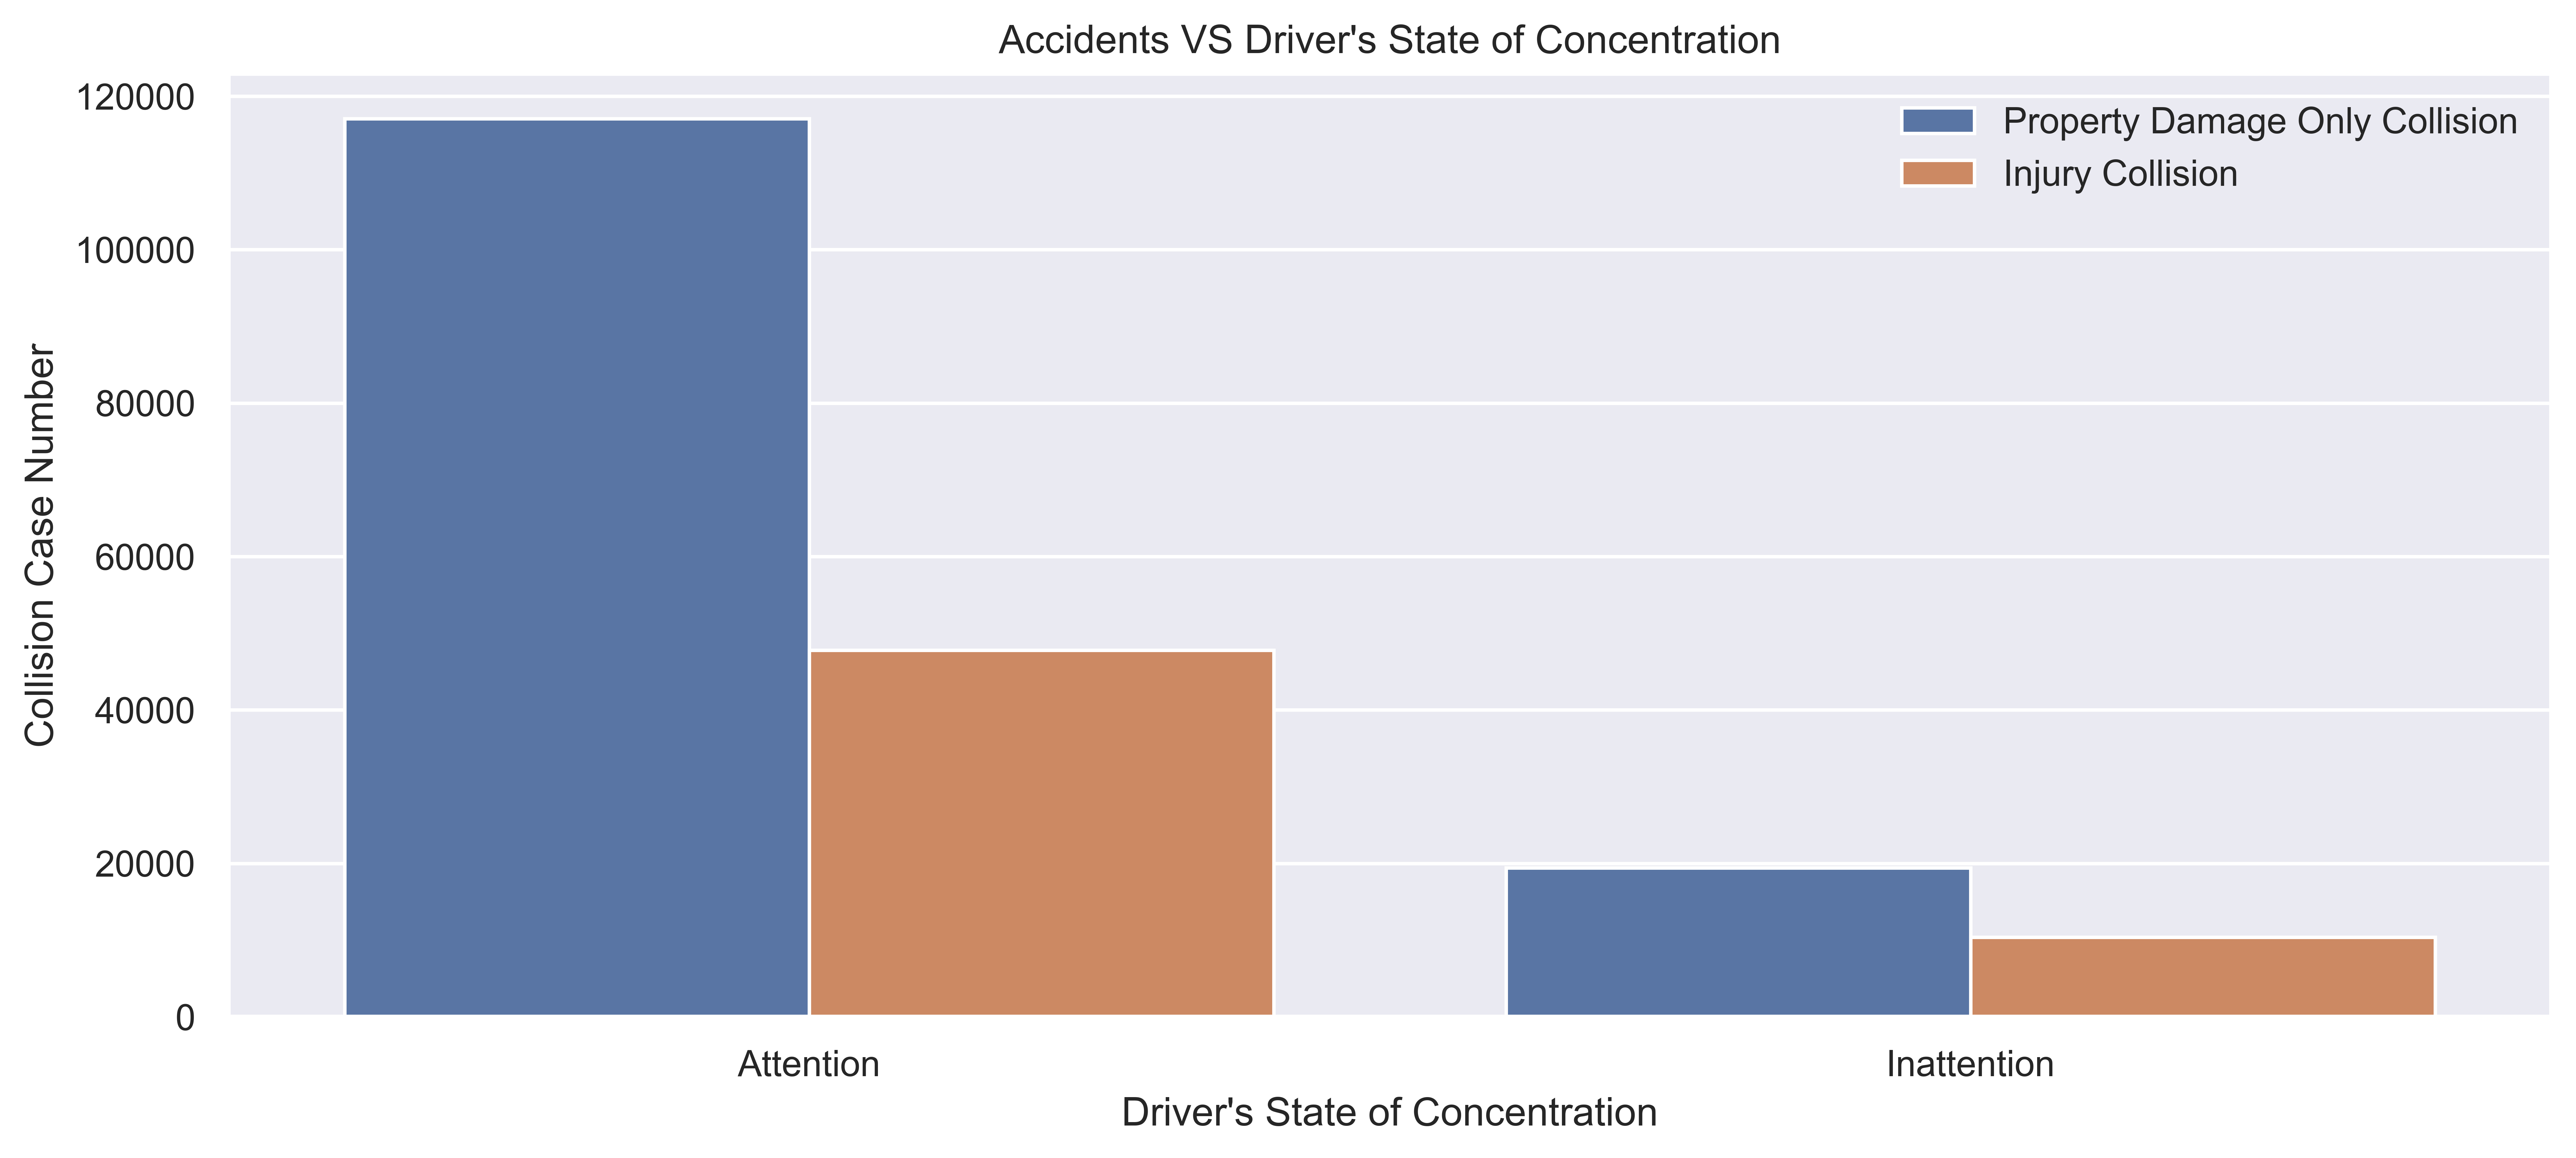

In [38]:
#the influence of INATTENTIONIND on severity
severity_level = ['Property Damage Only Collision','Injury Collision']
sns.set_style('darkgrid')

plt.figure(figsize=(12,5),dpi=800)
fig_inattention = sns.countplot(x='INATTENTIONIND',hue='SEVERITYCODE',data=raw_data)
fig_inattention.set(xlabel="Driver's State of Concentration", ylabel="Collision Case Number",
                    xticklabels=['Attention','Inattention'],title="Accidents VS Driver's State of Concentration")
fig_inattention.legend(severity_level,frameon=False)

plt.show()
fig_inattention.get_figure().savefig("./output/1-INATTENTIONIND.png")

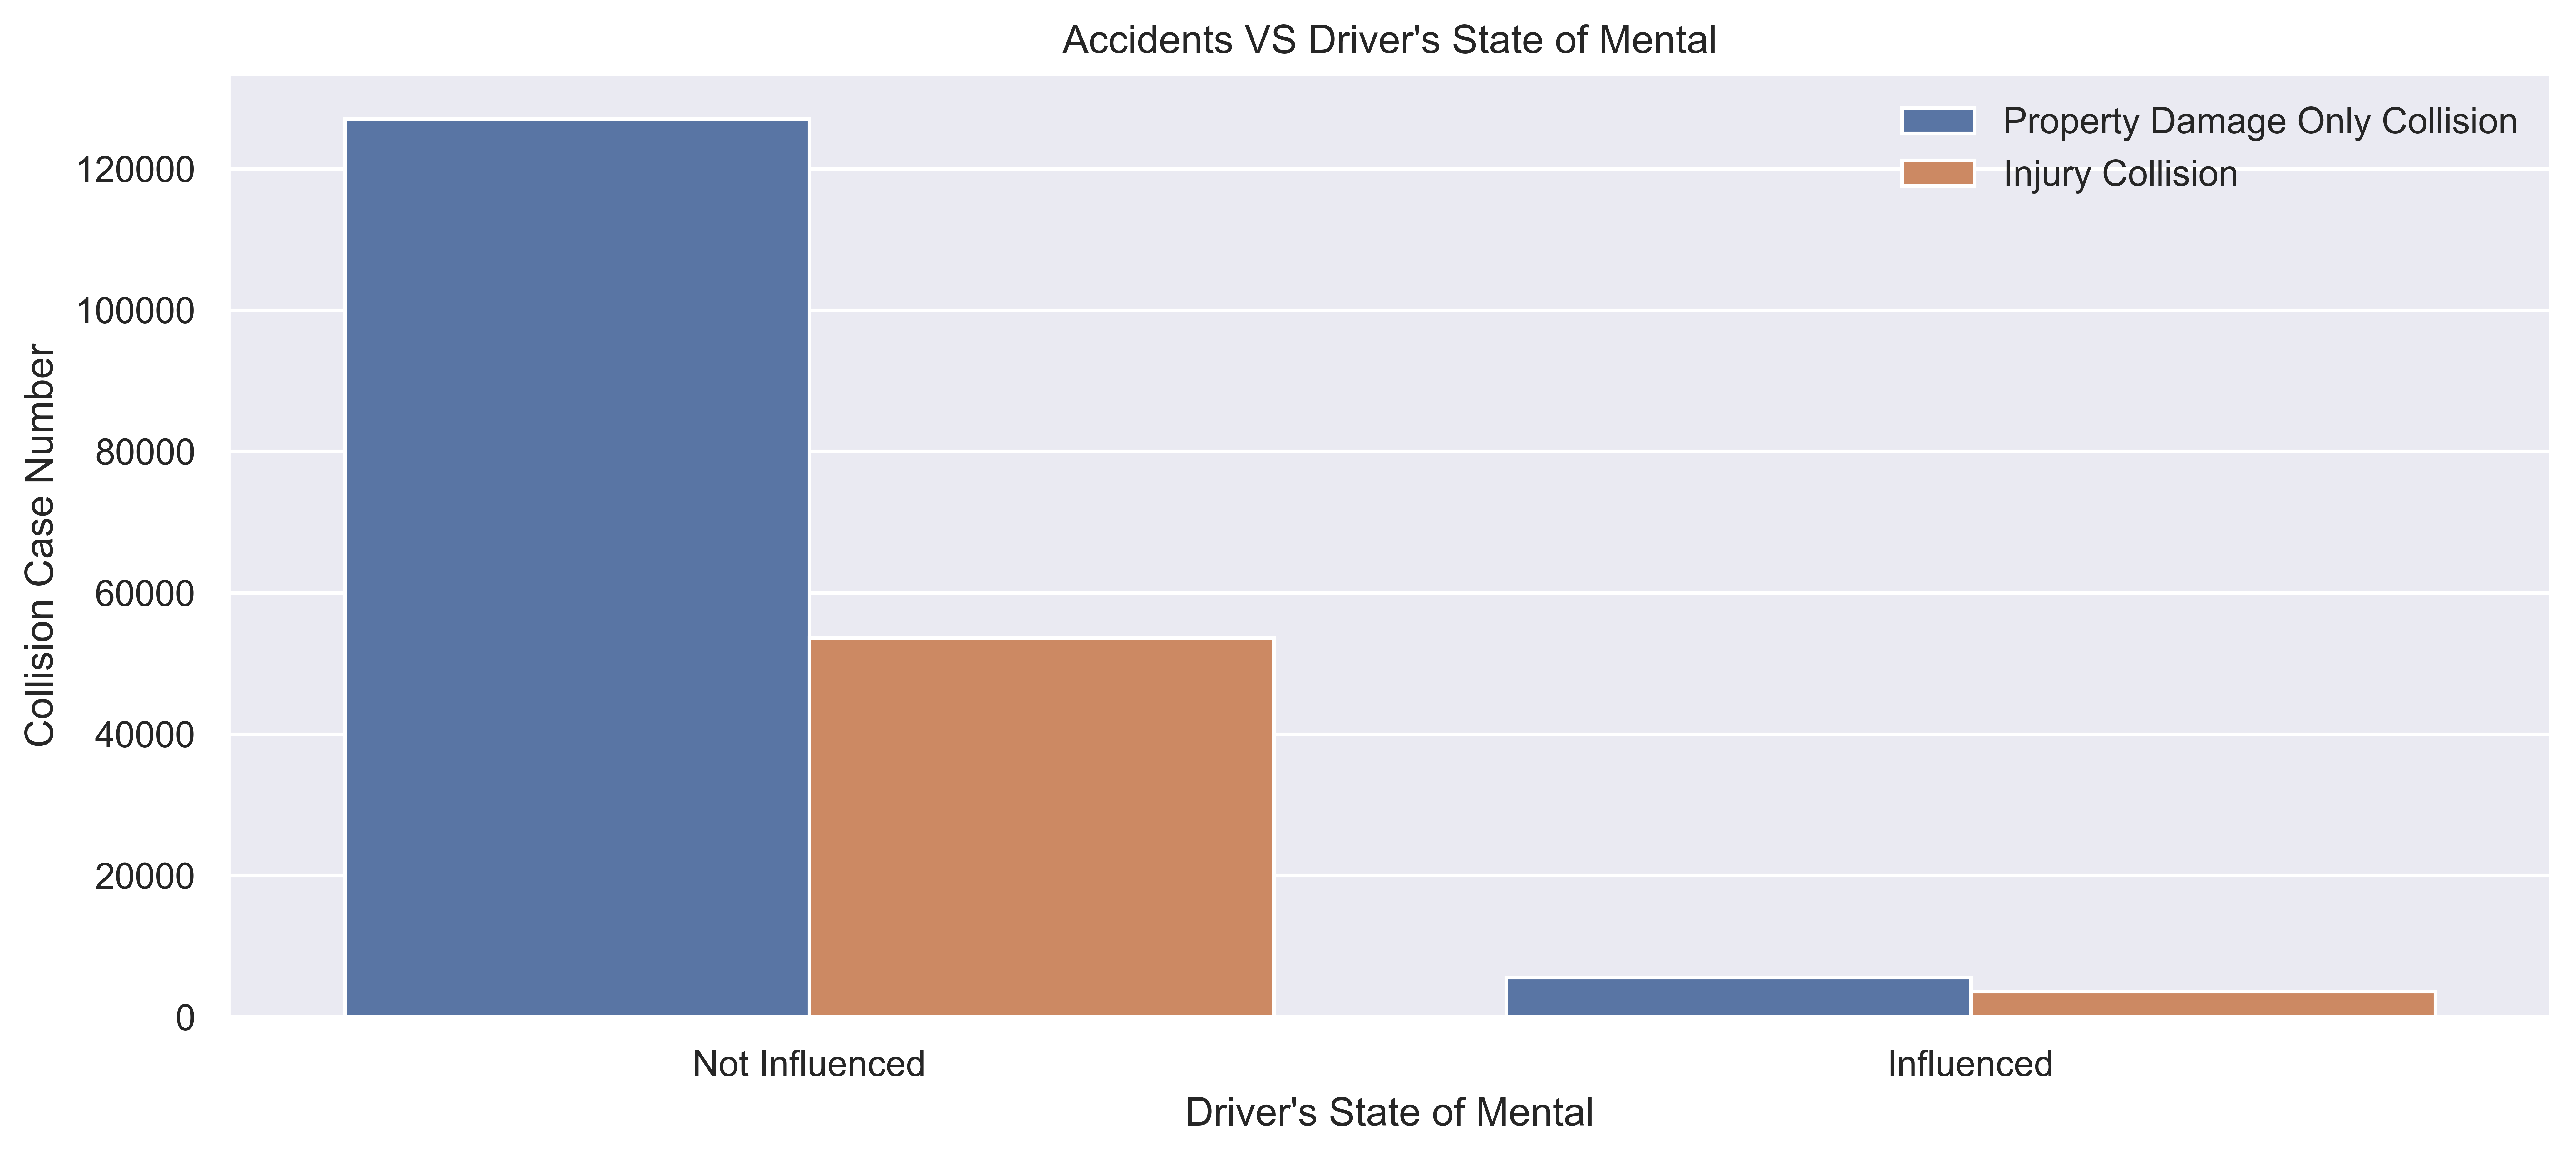

In [39]:
#the influence of UNDERINF on severity
plt.figure(figsize=(12,5),dpi=800)

fig_underinfluence = sns.countplot(x='UNDERINFL',hue='SEVERITYCODE',data=raw_data)
fig_underinfluence.set(xlabel="Driver's State of Mental", ylabel = "Collision Case Number",
                       xticklabels=['Not Influenced','Influenced'],title="Accidents VS Driver's State of Mental")
fig_underinfluence.legend(severity_level,frameon=False)

plt.show()
fig_underinfluence.get_figure().savefig("./output/2-UNDERINF.png")

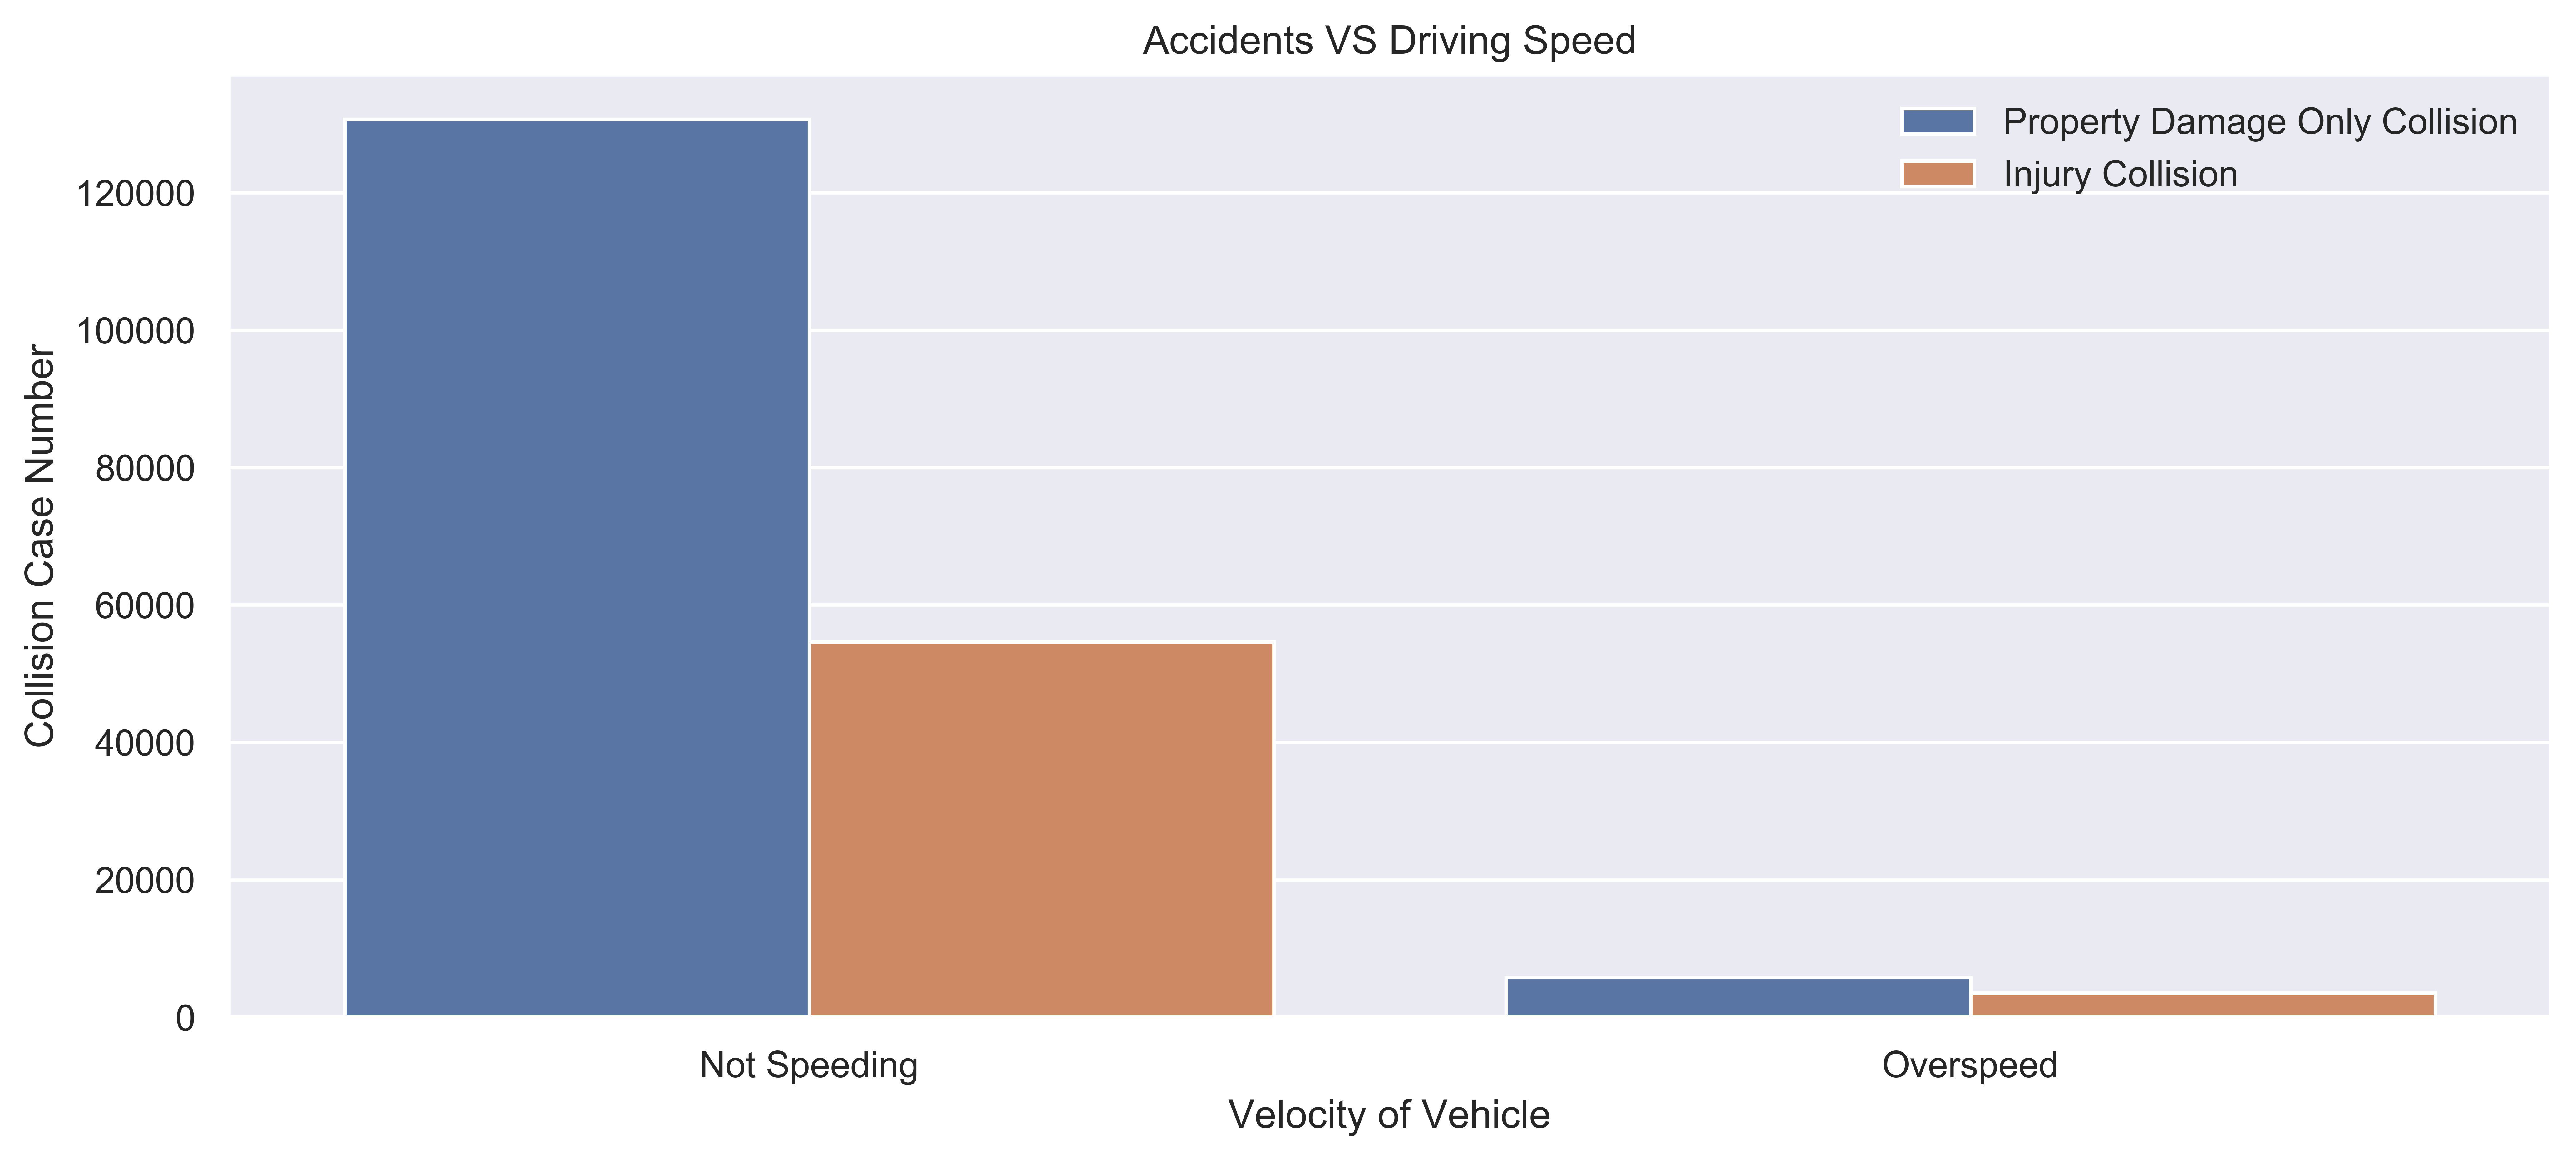

In [40]:
#the influence of SPEEDING on severity
plt.figure(figsize=(12,5),dpi=800)

fig_speeding = sns.countplot(x='SPEEDING',hue='SEVERITYCODE',data=raw_data)
fig_speeding.set(xlabel="Velocity of Vehicle", ylabel = "Collision Case Number",
                 xticklabels=['Not Speeding','Overspeed'],title="Accidents VS Driving Speed")
fig_speeding.legend(severity_level,frameon=False)

plt.show()
fig_speeding.get_figure().savefig("./output/3-SPEEDING.png")

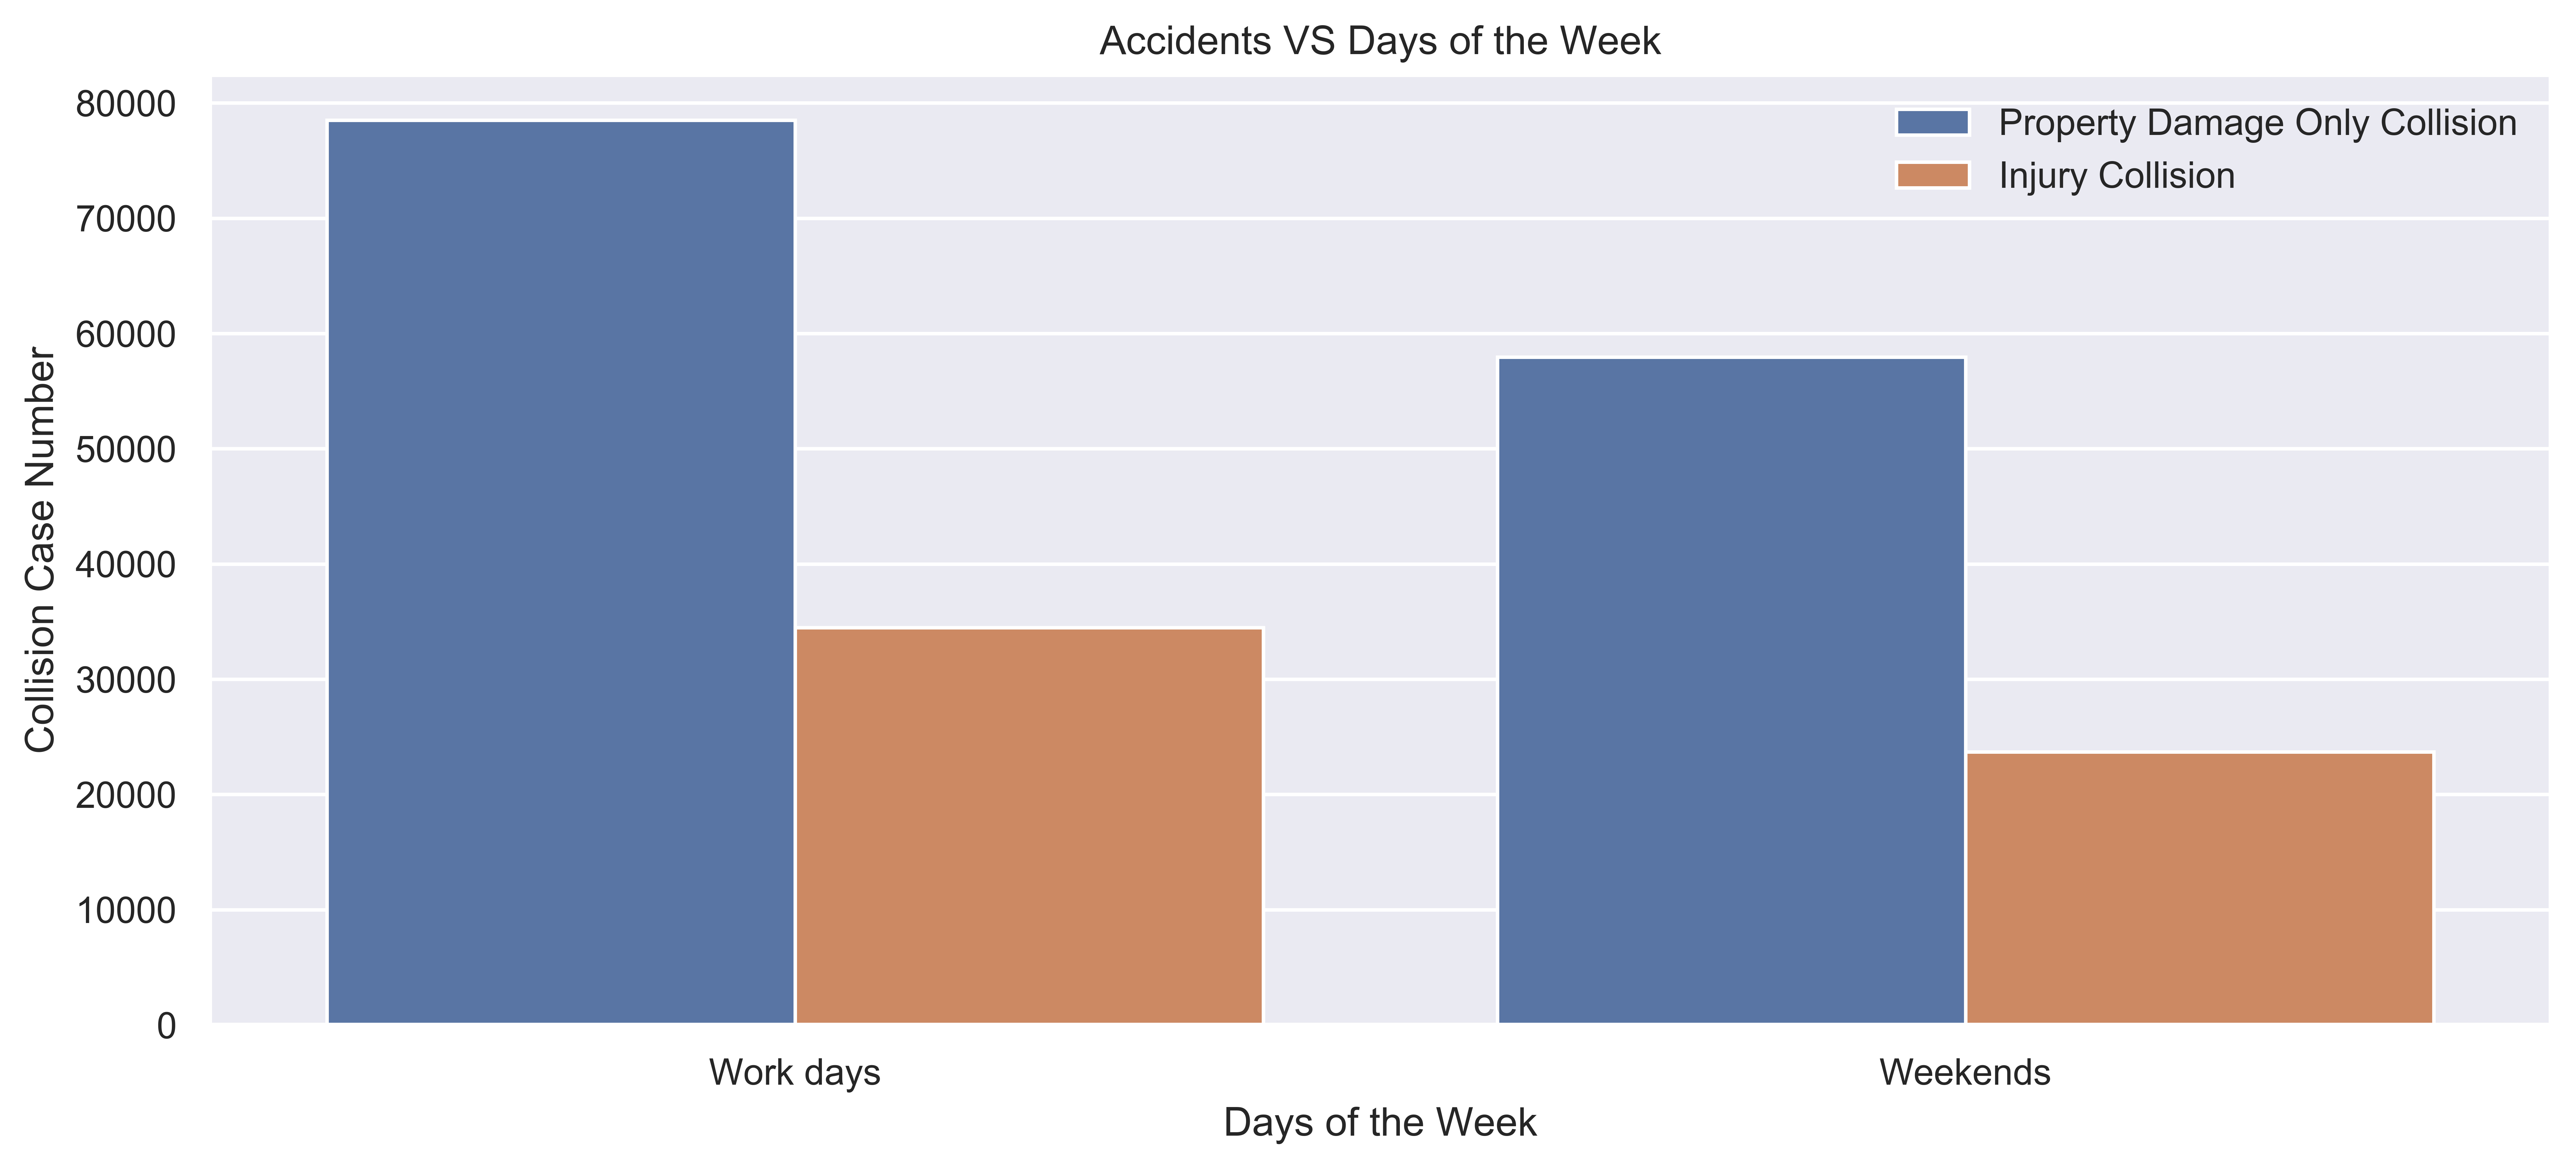

In [41]:
#the influence of WEEKEND on severity
plt.figure(figsize=(12,5),dpi=800)

fig_weekend = sns.countplot(x='WEEKEND',hue='SEVERITYCODE',data=raw_data)
fig_weekend.set(xlabel="Days of the Week", ylabel = "Collision Case Number",
                    xticklabels=['Work days','Weekends'],title="Accidents VS Days of the Week")
fig_weekend.legend(severity_level,frameon=False)

plt.show()
fig_weekend.get_figure().savefig("./output/4-WEEKEND.png")

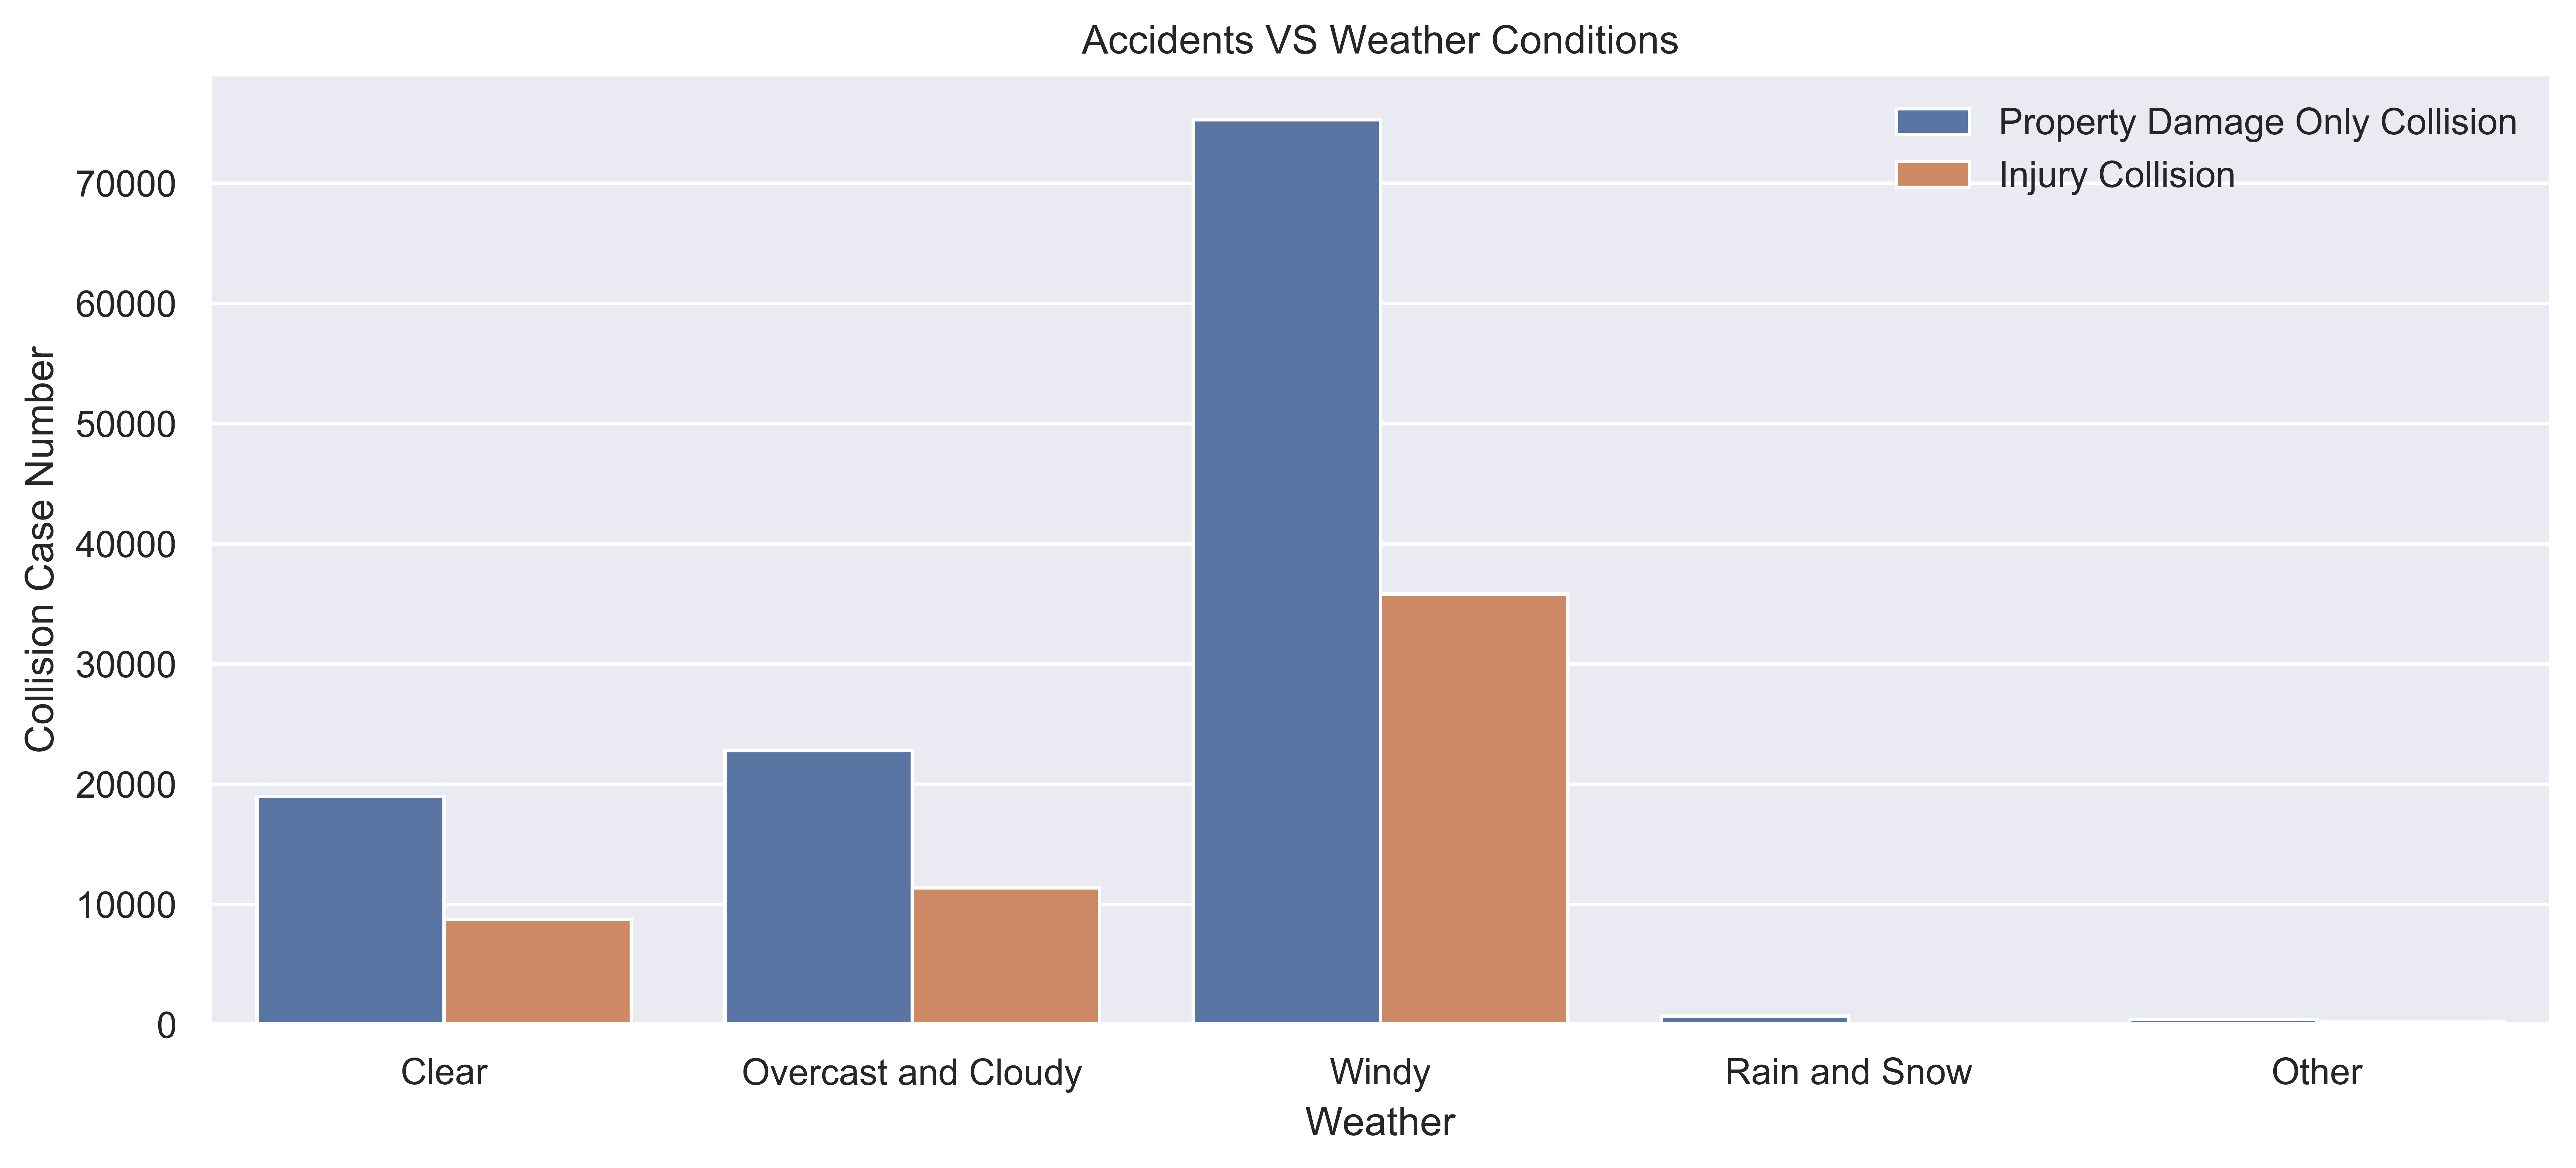

In [42]:
#the influence of WEATHER on severity
plt.figure(figsize=(12,5),dpi=800)

fig_weather = sns.countplot(x='WEATHER',hue='SEVERITYCODE',data=raw_data)
fig_weather.set(xlabel="Weather", ylabel = "Collision Case Number",
                    xticklabels=['Clear','Overcast and Cloudy','Windy','Rain and Snow','Other'],title="Accidents VS Weather Conditions")
fig_weather.legend(severity_level,frameon=False)

plt.show()
fig_weather.get_figure().savefig("./output/5-WEATHER.png")

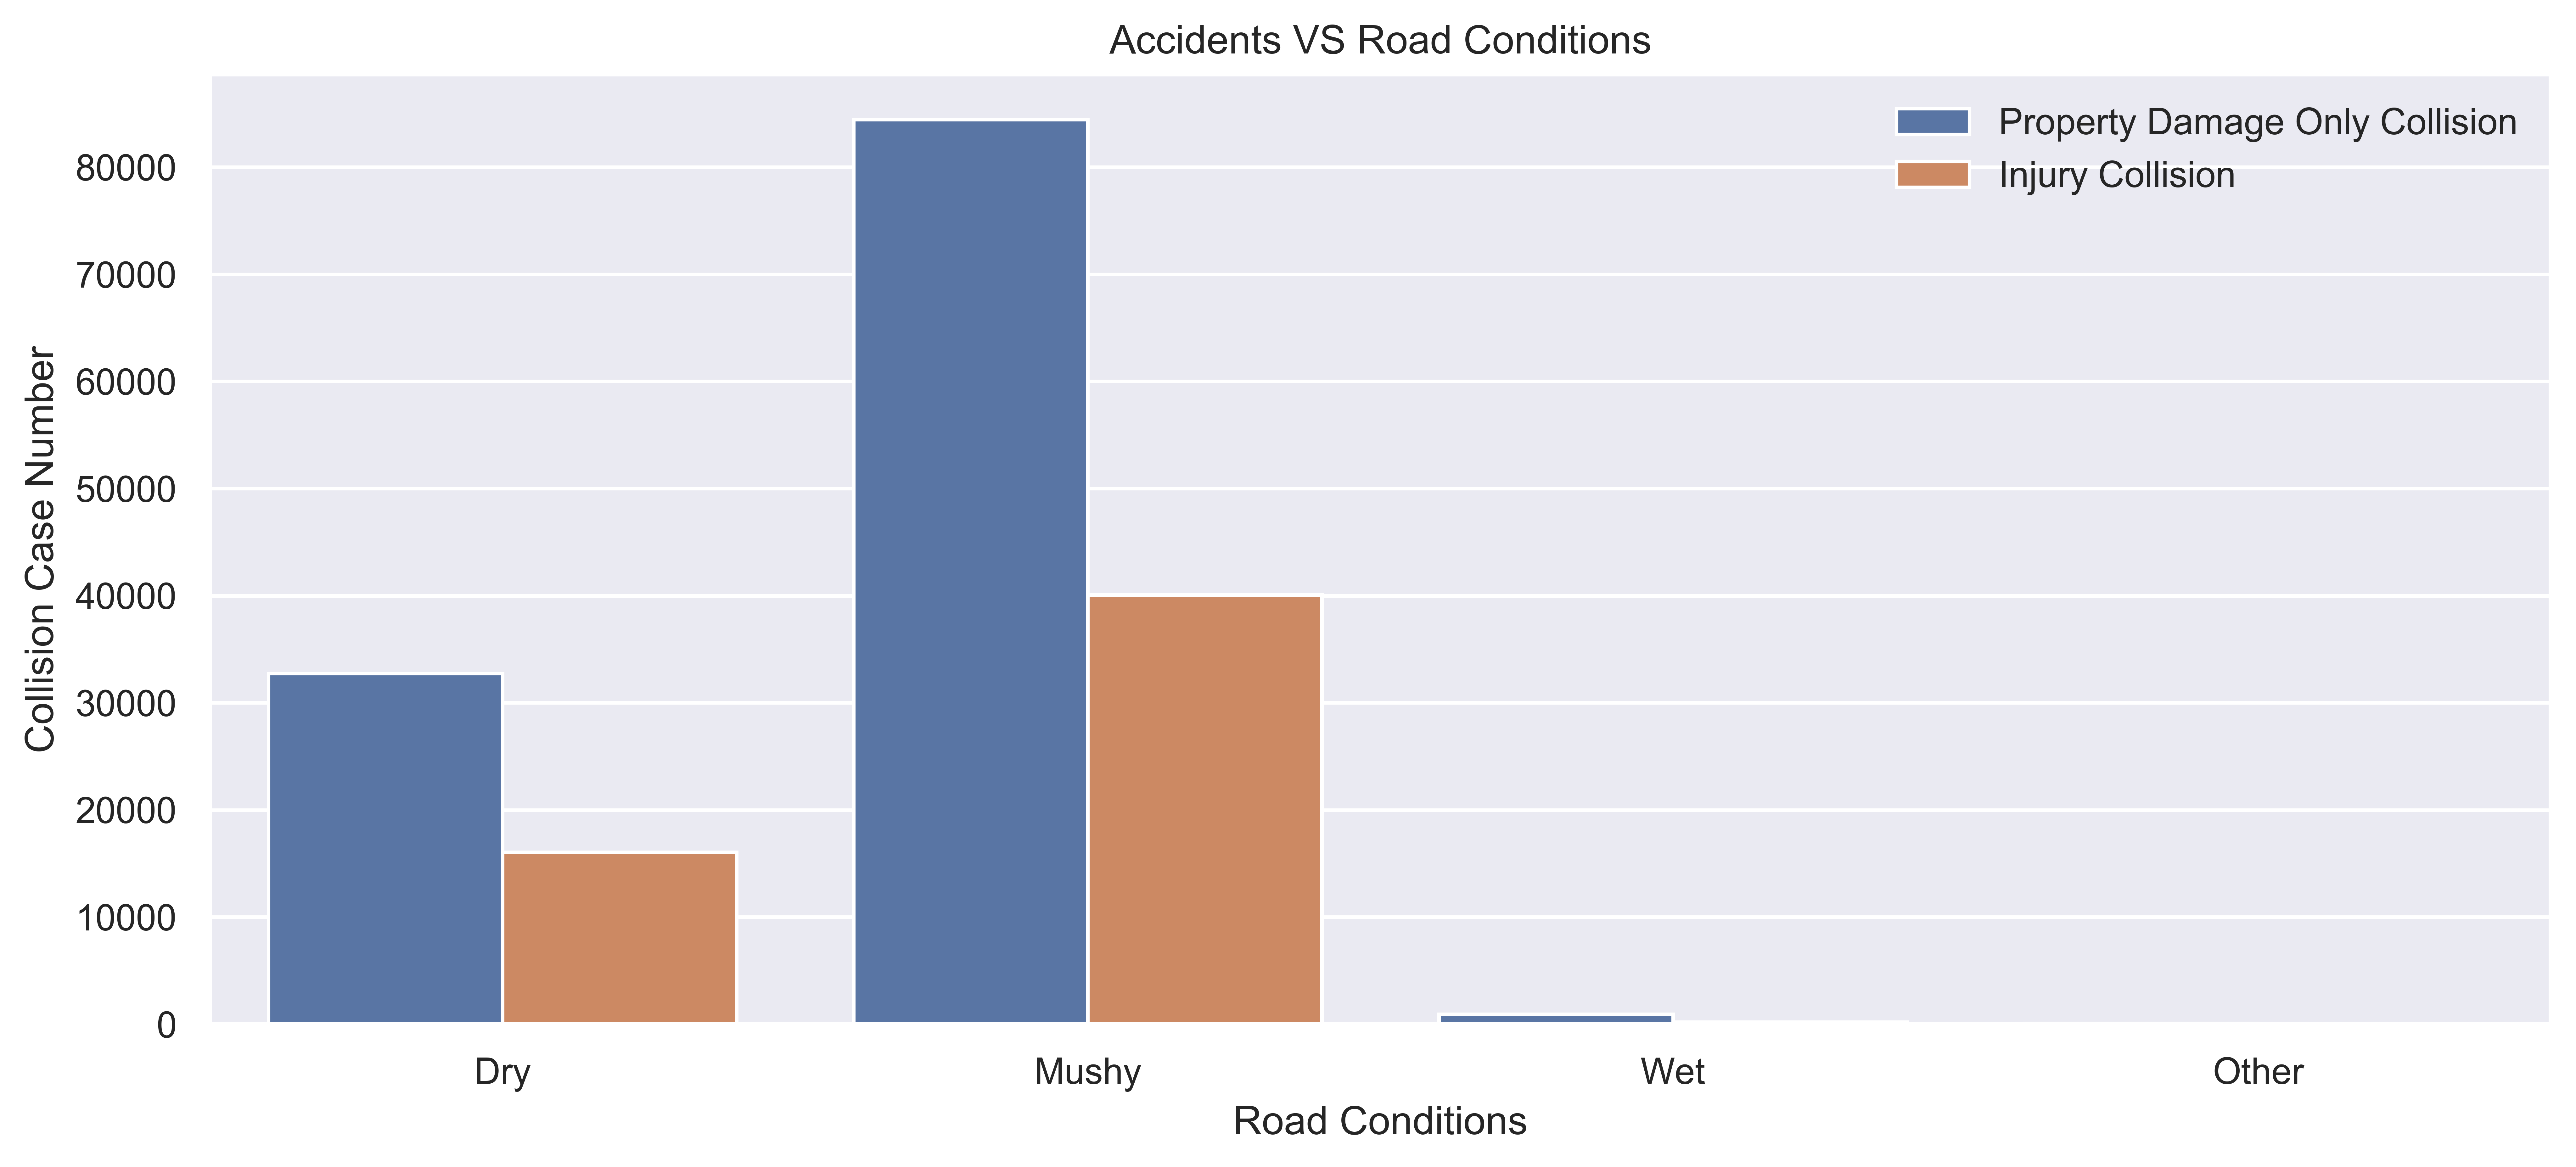

In [43]:
#the influence of ROADCOND on severity
plt.figure(figsize=(12,5),dpi=800)

fig_roadcond = sns.countplot(x='ROADCOND',hue='SEVERITYCODE',data=raw_data)
fig_roadcond.set(xlabel="Road Conditions", ylabel = "Collision Case Number",
                    xticklabels=['Dry','Mushy','Wet','Other'],title="Accidents VS Road Conditions")
fig_roadcond.legend(severity_level,frameon=False)

plt.show()
fig_roadcond.get_figure().savefig("./output/6-ROADCOND.png")

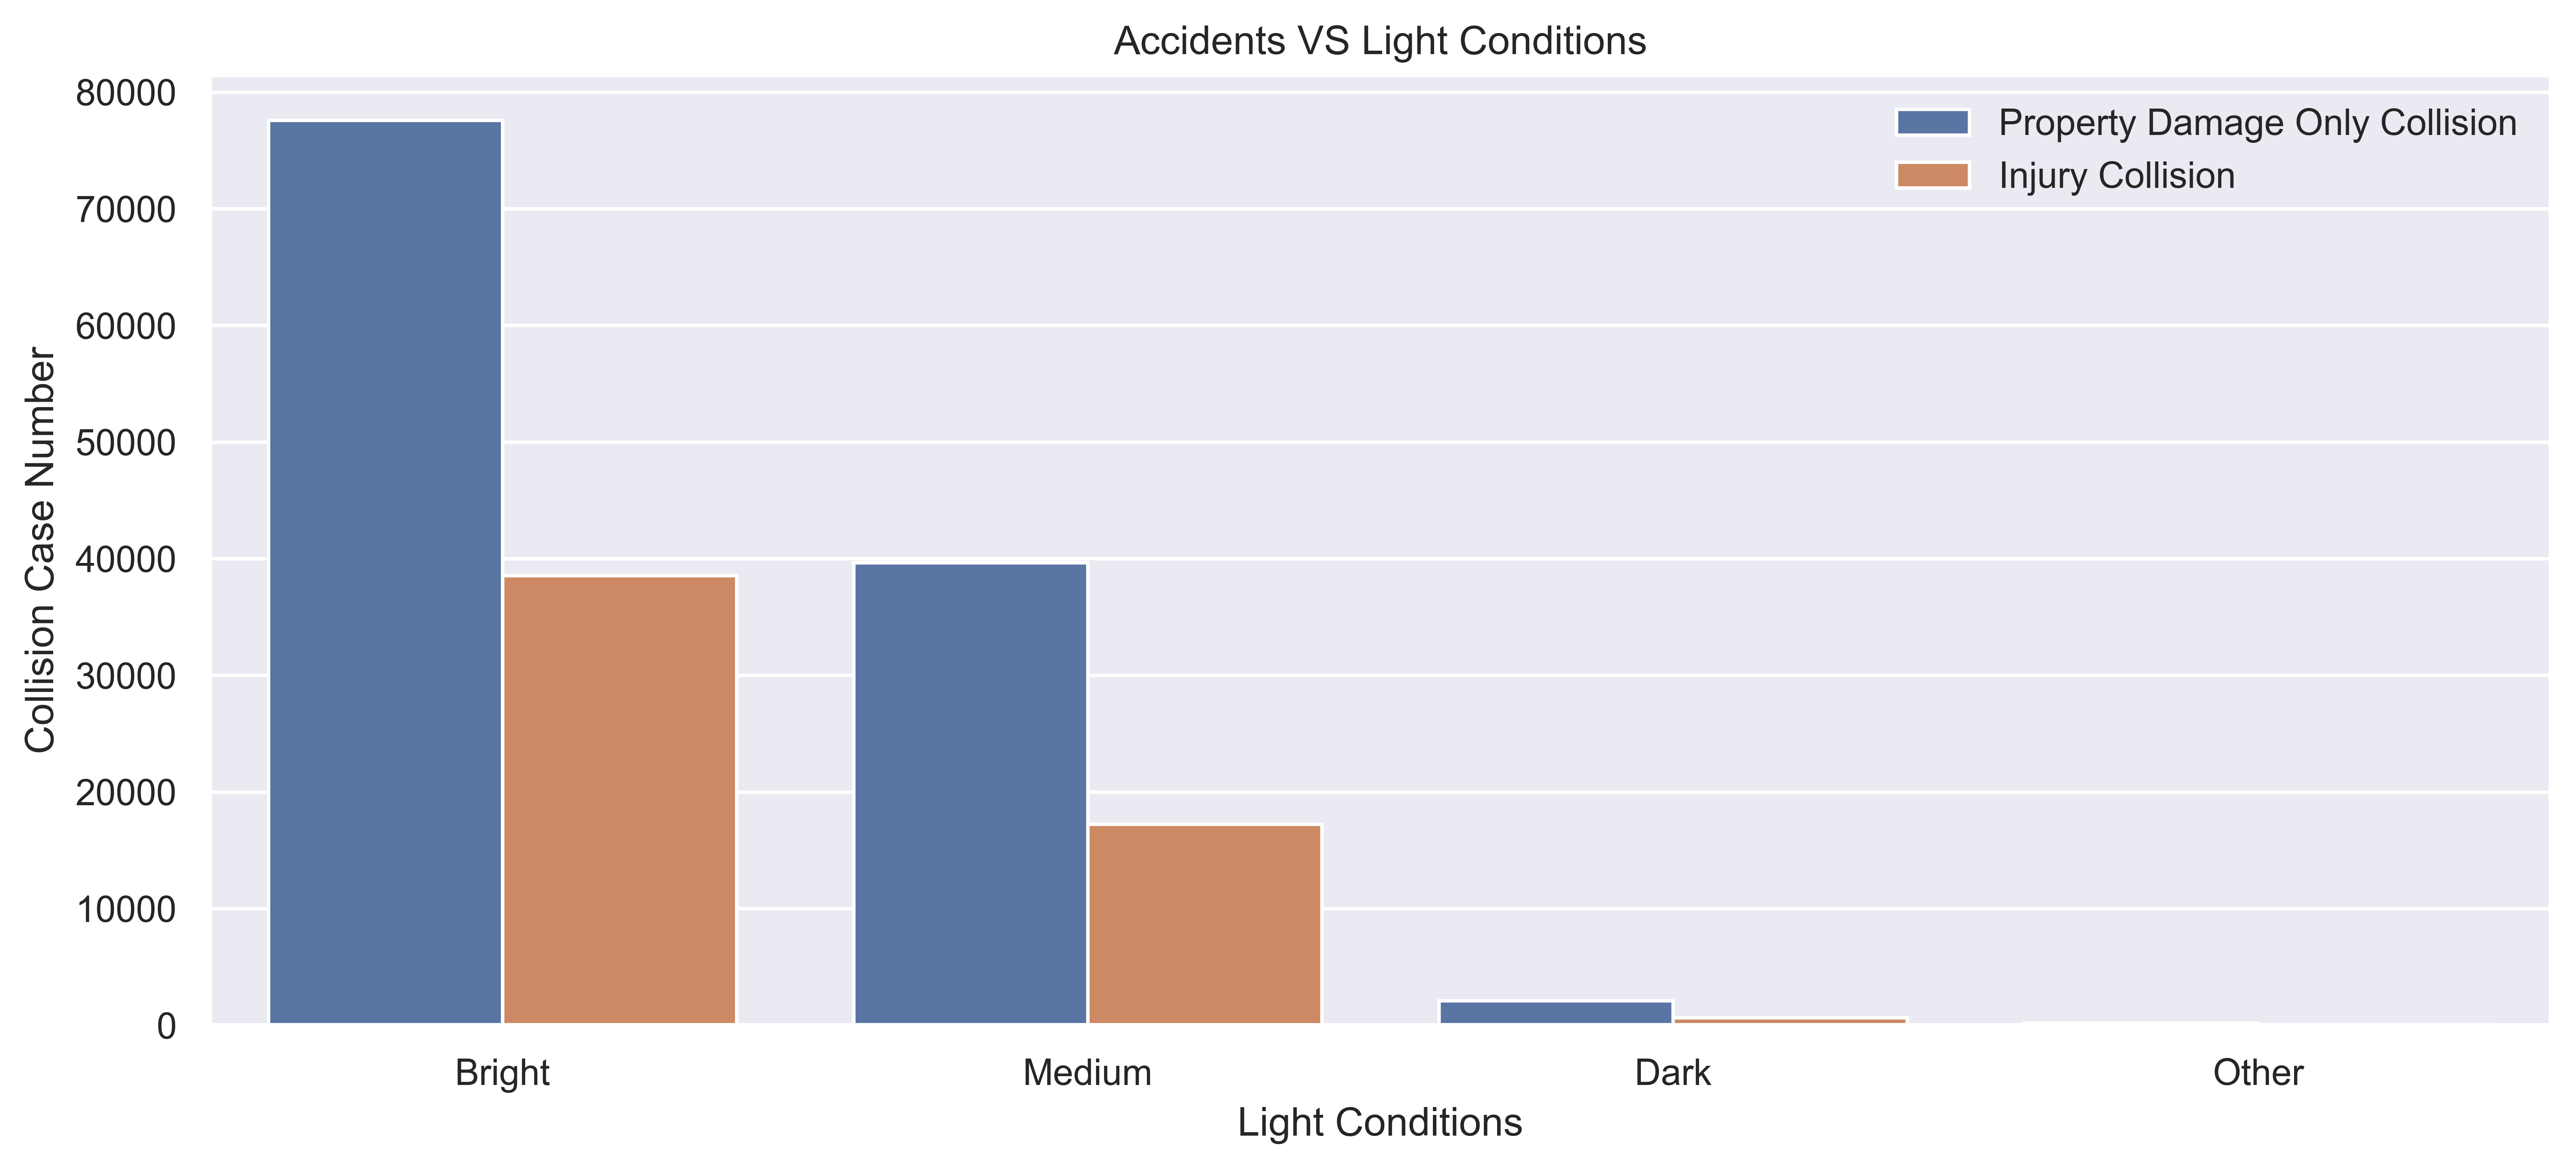

In [44]:
#the influence of LIGHTCOND on severity
plt.figure(figsize=(12,5),dpi=800)

fig_lightcond = sns.countplot(x='LIGHTCOND',hue='SEVERITYCODE',data=raw_data)
fig_lightcond.set(xlabel="Light Conditions", ylabel = "Collision Case Number",
                    xticklabels=['Bright','Medium','Dark','Other'],title="Accidents VS Light Conditions")
fig_lightcond.legend(severity_level,frameon=False)

plt.show()
fig_lightcond.get_figure().savefig("./output/7-LIGHTCOND.png")

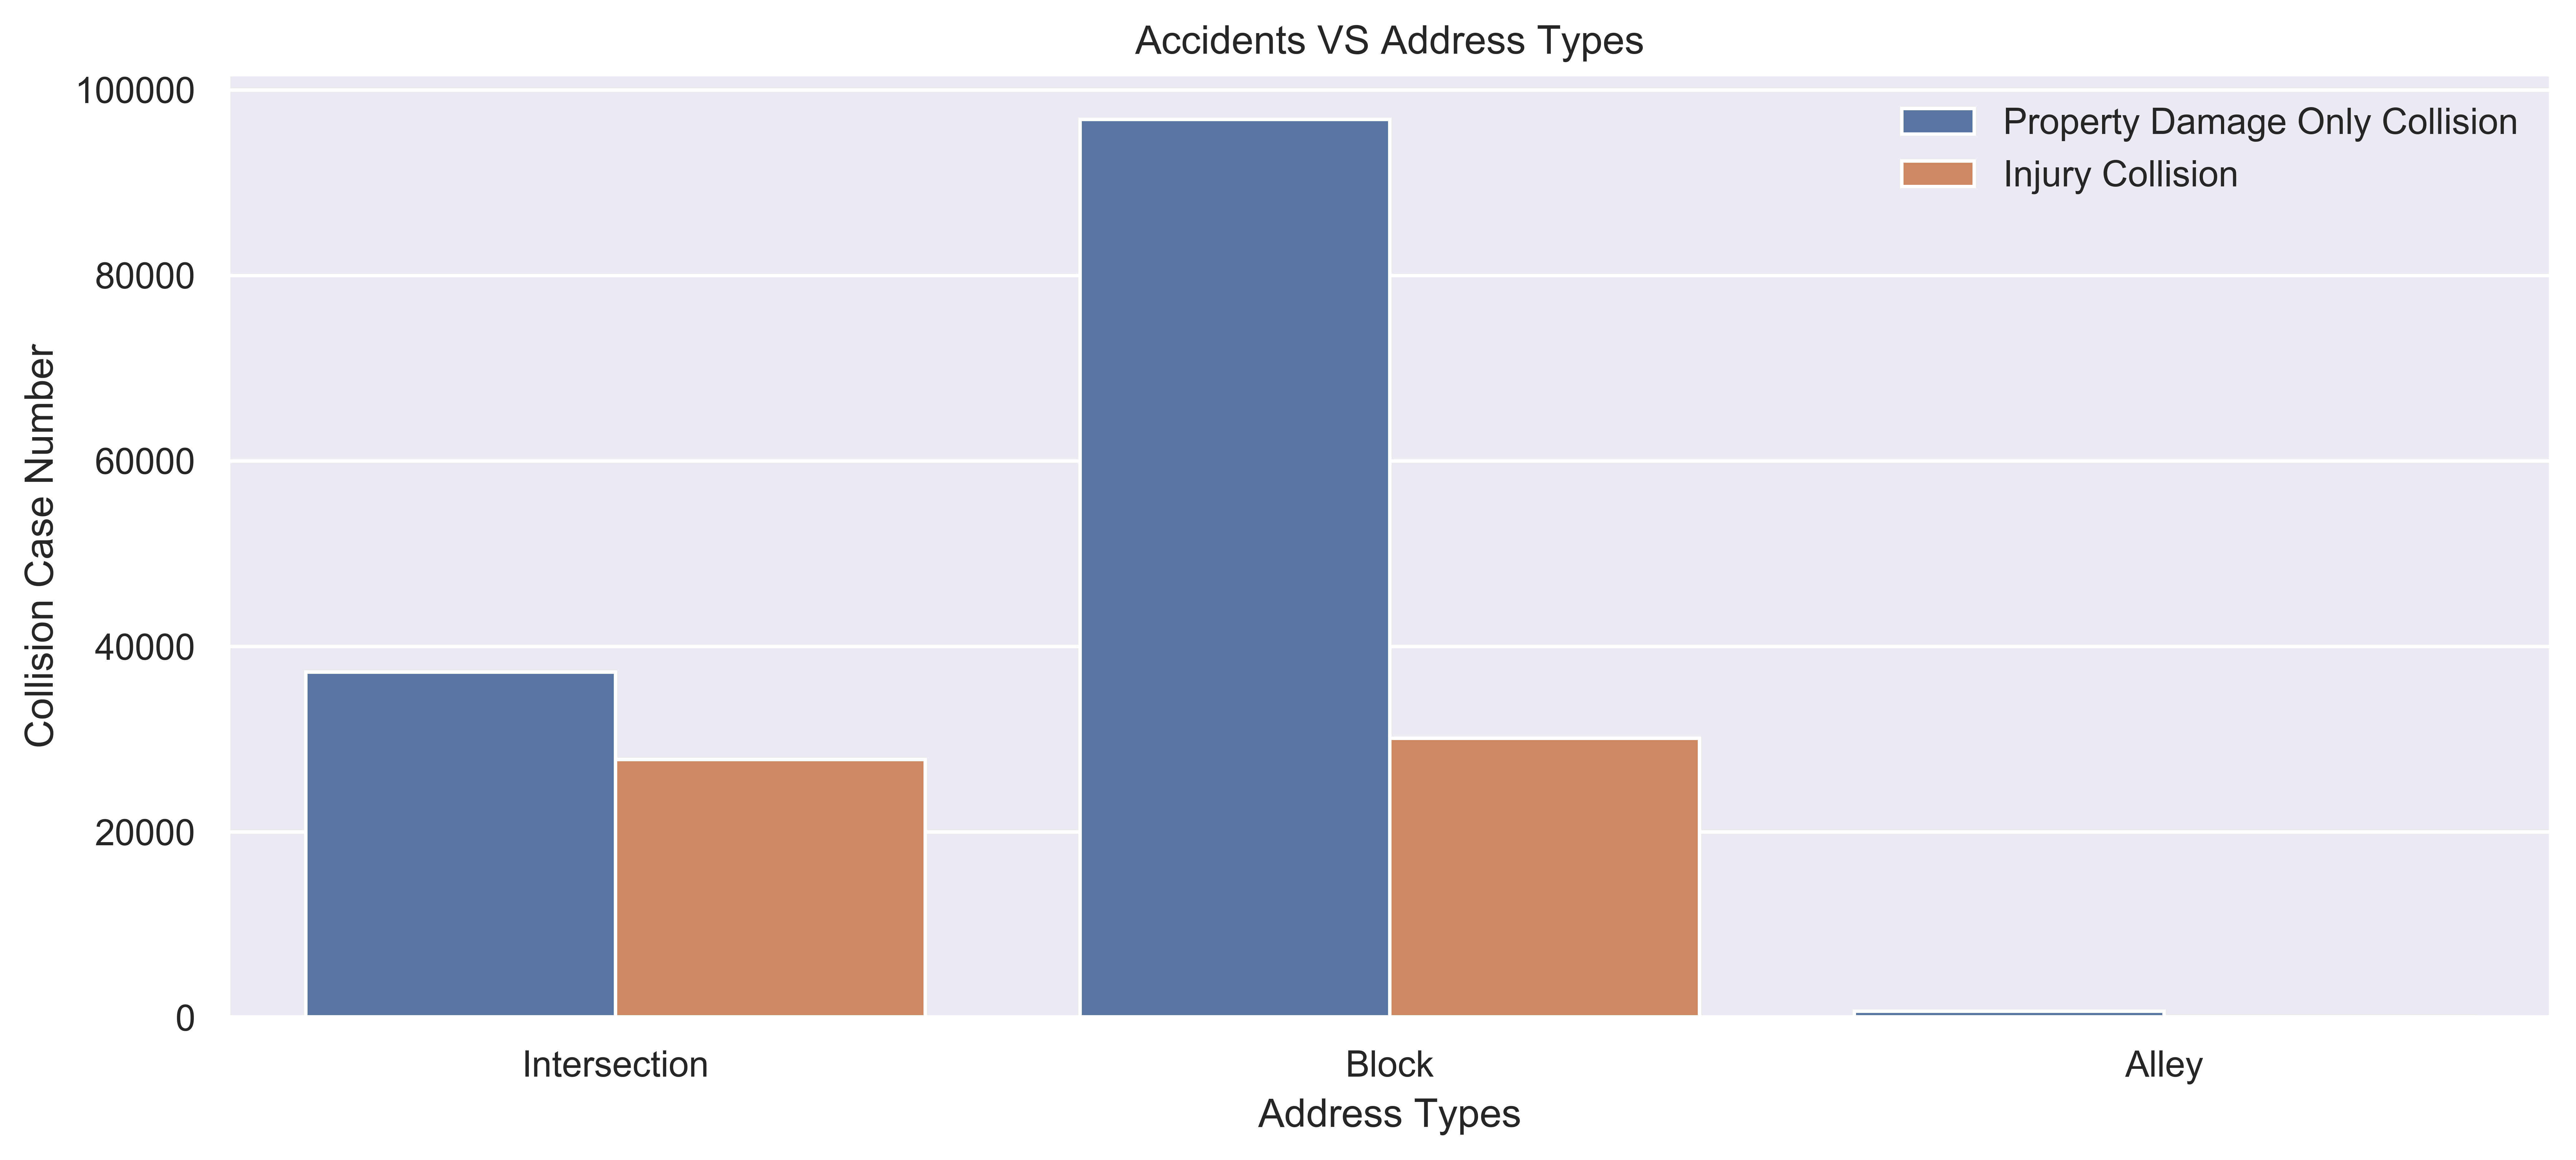

In [45]:
#the influence of ADDRTYPE on severity
plt.figure(figsize=(12,5),dpi=800)

fig_addtype = sns.countplot(x='ADDRTYPE',hue='SEVERITYCODE',data=raw_data)
fig_addtype.set(xlabel="Address Types", ylabel = "Collision Case Number",
                    title="Accidents VS Address Types")
fig_addtype.legend(severity_level,frameon=False)

plt.show()
fig_addtype.get_figure().savefig("./output/8-ADDRTYPE.png")

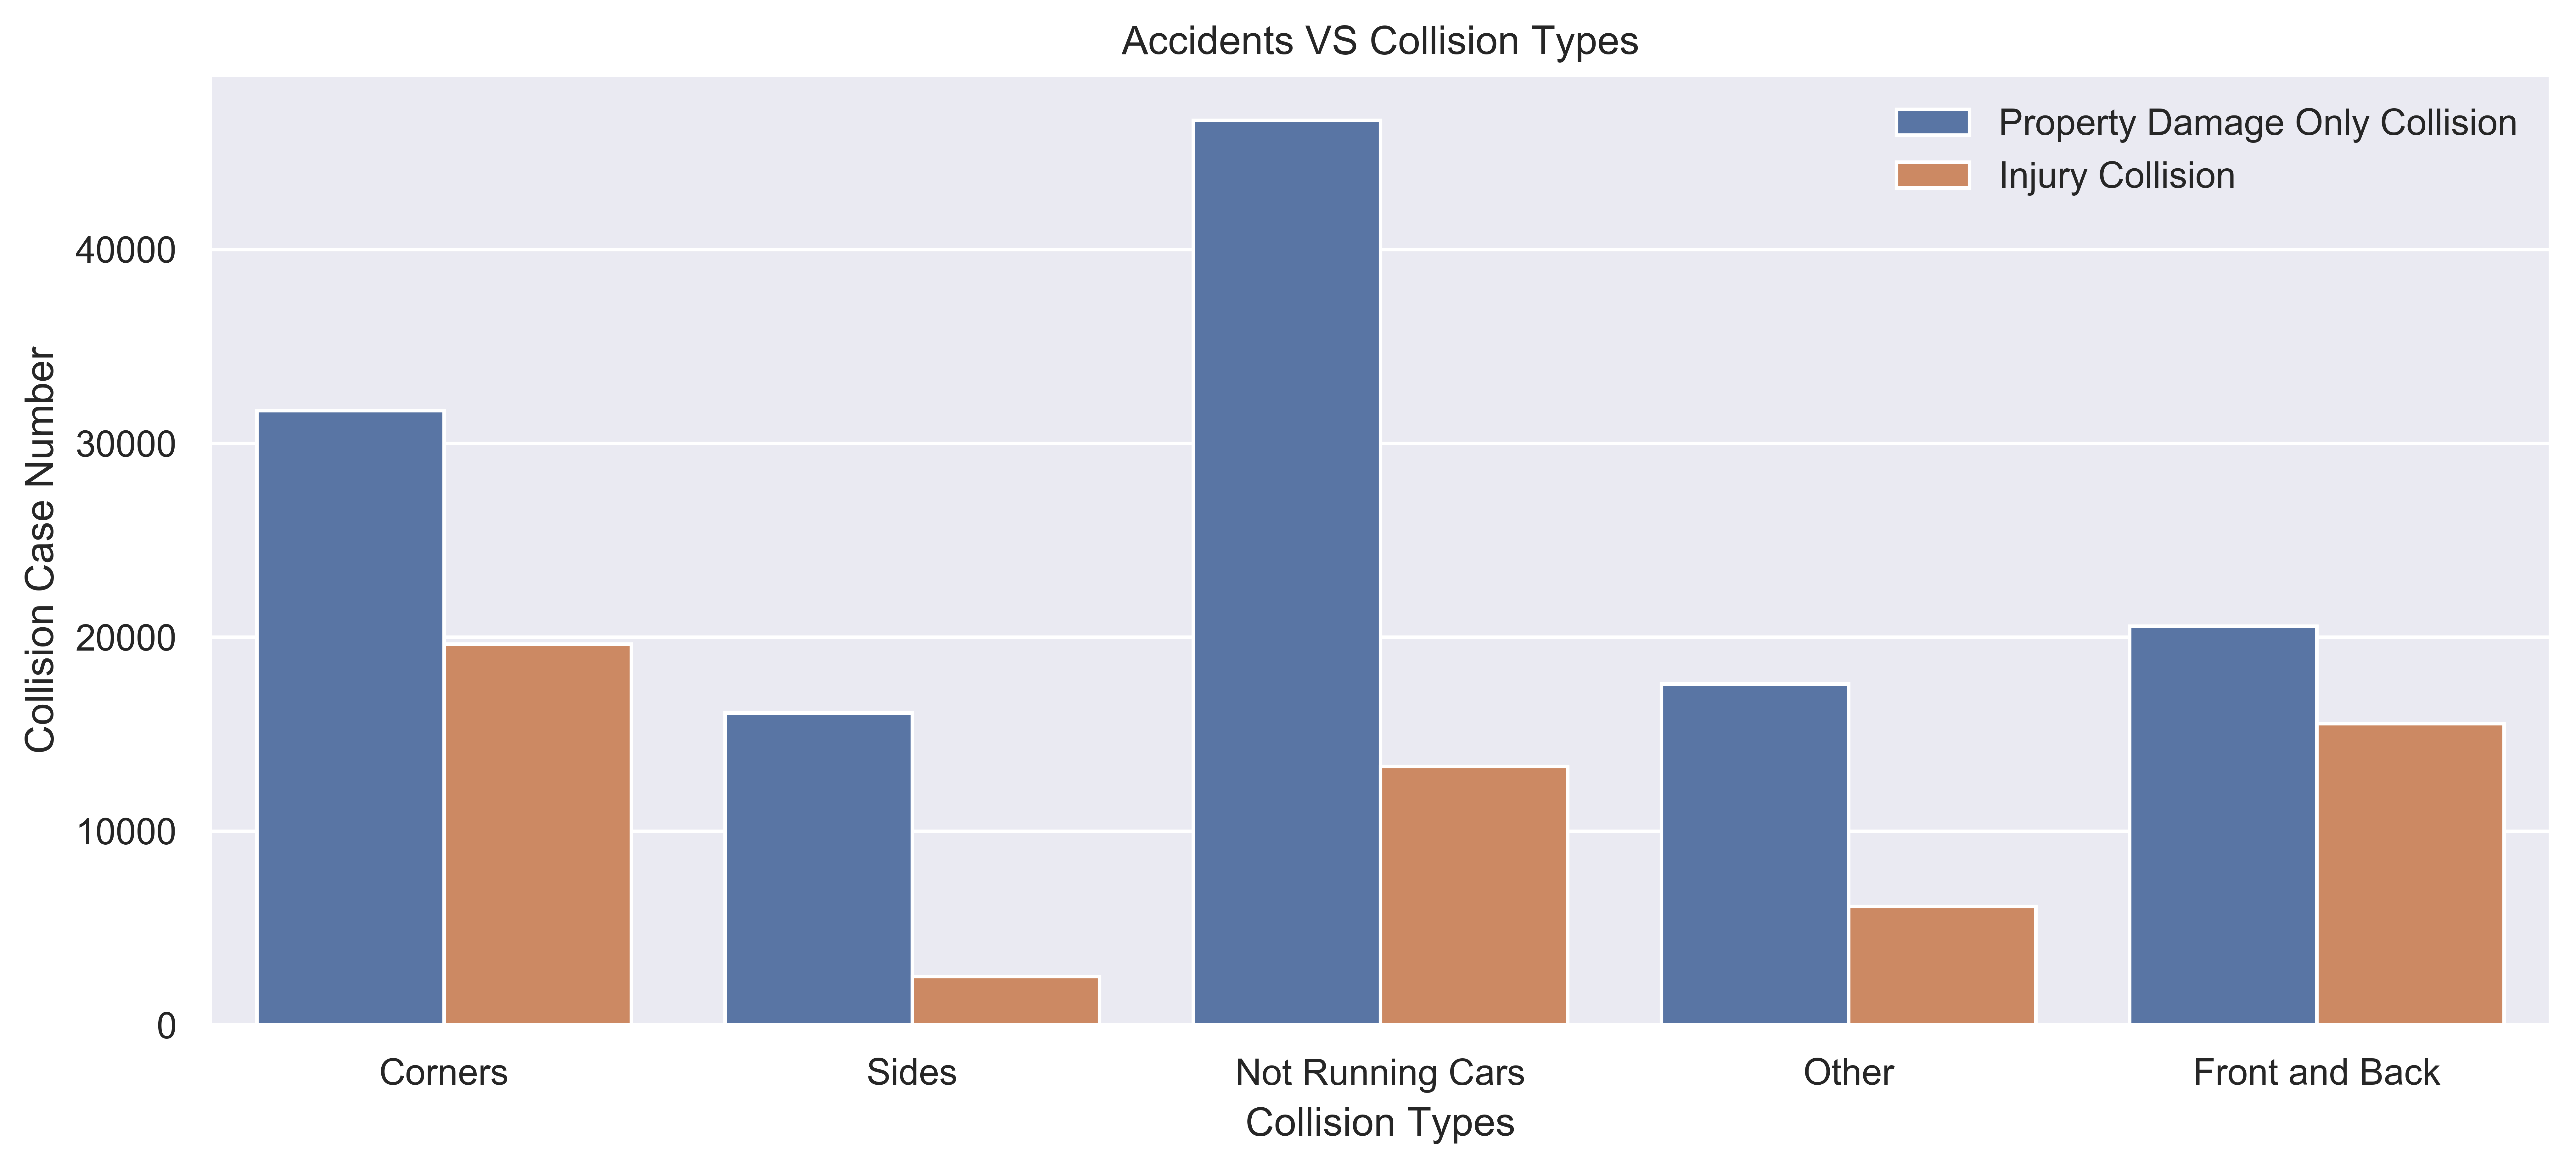

In [46]:
#the influence of COLLISIONTYPE on severity
plt.figure(figsize=(12,5),dpi=800)

fig_collisiontype = sns.countplot(x='COLLISIONTYPE',hue='SEVERITYCODE',data=raw_data)
fig_collisiontype.set(xlabel="Collision Types", ylabel = "Collision Case Number",
                    title="Accidents VS Collision Types")
fig_collisiontype.legend(severity_level,frameon=False)

plt.show()
fig_collisiontype.get_figure().savefig("./output/9-COLLISIONTYPE.png")

In [22]:
#calculate the percentage of accident severity types under the influence of indicators
def factor_influence_percentage(indexes):
    inf_percent=[]
    for index in indexes[1:]:
        relation = pd.DataFrame(raw_data.groupby([index])['SEVERITYCODE'].value_counts(normalize=True))
        print(relation)
        #even number line shows the serious percentage
        factor_max = relation[::2].max()
        factor_min = relation[::2].min()
        inf_delta = round((factor_max-factor_min)[0]*100,2)
        print('The influence of {name} on severity is {percentage} percentile.'.format(name=index,percentage = inf_delta),
              '\n-----------------------------------------')
        inf_percent.append(inf_delta)
    factor_inf_summary =pd.DataFrame({'Factors':indexes[1:],'Influence Percentile':inf_percent}).sort_values(by='Influence Percentile',ascending=False)
    return factor_inf_summary
    
factor_inf_summary = factor_influence_percentage(indexes)
print(factor_inf_summary)

                             SEVERITYCODE
INATTENTIONIND SEVERITYCODE              
No             1                 0.710126
               2                 0.289874
Yes            1                 0.651166
               2                 0.348834
The influence of INATTENTIONIND on severity is 5.9 percentile. 
-----------------------------------------
                        SEVERITYCODE
UNDERINFL SEVERITYCODE              
No        1                 0.703340
          2                 0.296660
Yes       1                 0.609473
          2                 0.390527
The influence of UNDERINFL on severity is 9.39 percentile. 
-----------------------------------------
                       SEVERITYCODE
SPEEDING SEVERITYCODE              
No       1                 0.705099
         2                 0.294901
Yes      1                 0.621665
         2                 0.378335
The influence of SPEEDING on severity is 8.34 percentile. 
-----------------------------------------
 

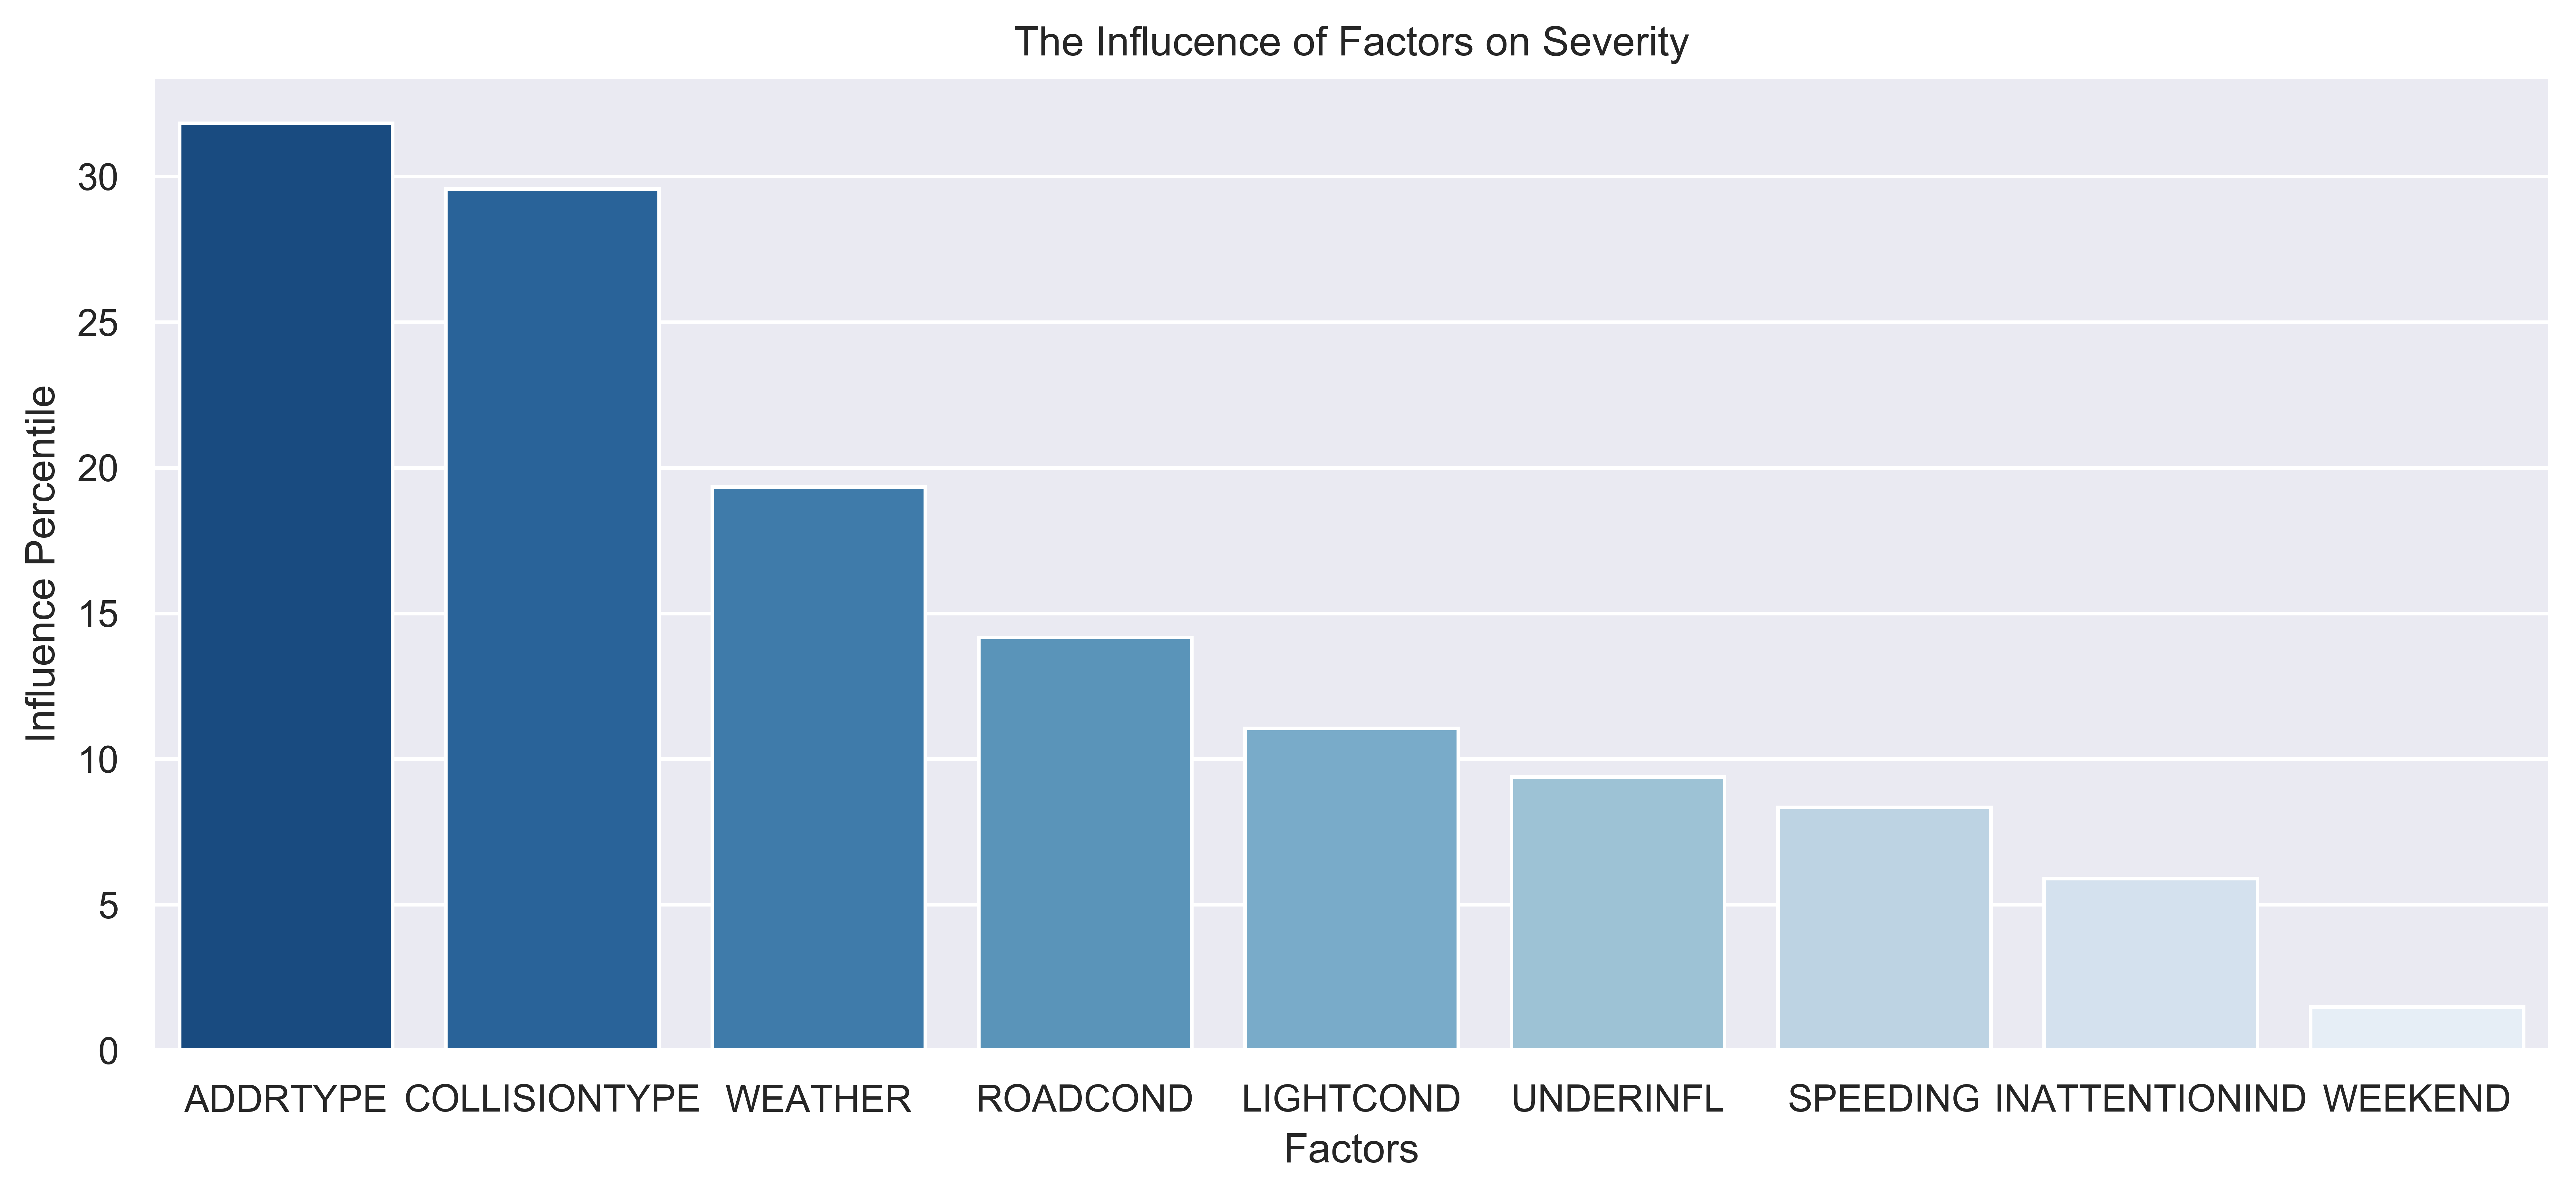

In [47]:
#show the influence of features on severity in order
plt.figure(figsize=(12,5),dpi=800)

factor_inf_img = sns.barplot(x=factor_inf_summary['Factors'],
                             y=factor_inf_summary['Influence Percentile'],
                             palette='Blues_r')
factor_inf_img.set(title='The Influcence of Factors on Severity')
sns.set(font_scale=0.95)

plt.show()
factor_inf_img.get_figure().savefig("./output/The influence of factors on severity.png")

## 4.2 Map Illustration

In [24]:
#select address in intersection injury cases
raw_data['ADDRESS']=raw_data['X'].astype(str) + ' ' + raw_data['Y'].astype(str)
raw_data['ADDRESS'].replace(to_replace=['nan nan'],value=np.nan,inplace=True)
map_data =raw_data[(raw_data['SEVERITYCODE']==2) &
                   (raw_data['ADDRTYPE']=='Intersection')]
print(map_data.shape[0])
map_data = map_data['ADDRESS'].dropna()
print(map_data.shape[0])

#count the number of accident happend in a same place
serious_intersetion = map_data.value_counts(ascending=False).rename_axis('ADDRESS').reset_index(name='Sum')
print(serious_intersetion['Sum'].median())
serious_intersetion_top1000 = serious_intersetion.head(1000)

serious_intersetion_top1000[['X','Y']] = serious_intersetion_top1000['ADDRESS'].str.split(expand=True)
serious_intersetion_top1000[['X','Y']] = serious_intersetion_top1000[['X','Y']] .astype(float)
serious_intersetion_top1000['Sum'] = serious_intersetion_top1000['Sum'] .astype(str) + ' Collisions'
print(serious_intersetion_top1000)


27819
27718
2.0
                             ADDRESS             Sum           X          Y
0    -122.32807859999998 47.60416123  107 Collisions -122.328079  47.604161
1           -122.3324513 47.60726631   73 Collisions -122.332451  47.607266
2    -122.32891310000001 47.61346582   69 Collisions -122.328913  47.613466
3           -122.3167334 47.61288924   68 Collisions -122.316733  47.612889
4    -122.27766409999998 47.55117602   67 Collisions -122.277664  47.551176
..                               ...             ...         ...        ...
995         -122.3240969 47.60484127    8 Collisions -122.324097  47.604841
996         -122.3661875 47.66503748    8 Collisions -122.366187  47.665037
997         -122.3064263 47.54573946    8 Collisions -122.306426  47.545739
998  -122.28765890000001 47.58295465    8 Collisions -122.287659  47.582955
999  -122.38541670000001 47.69058226    8 Collisions -122.385417  47.690582

[1000 rows x 4 columns]


C:\Users\IVY\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\IVY\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


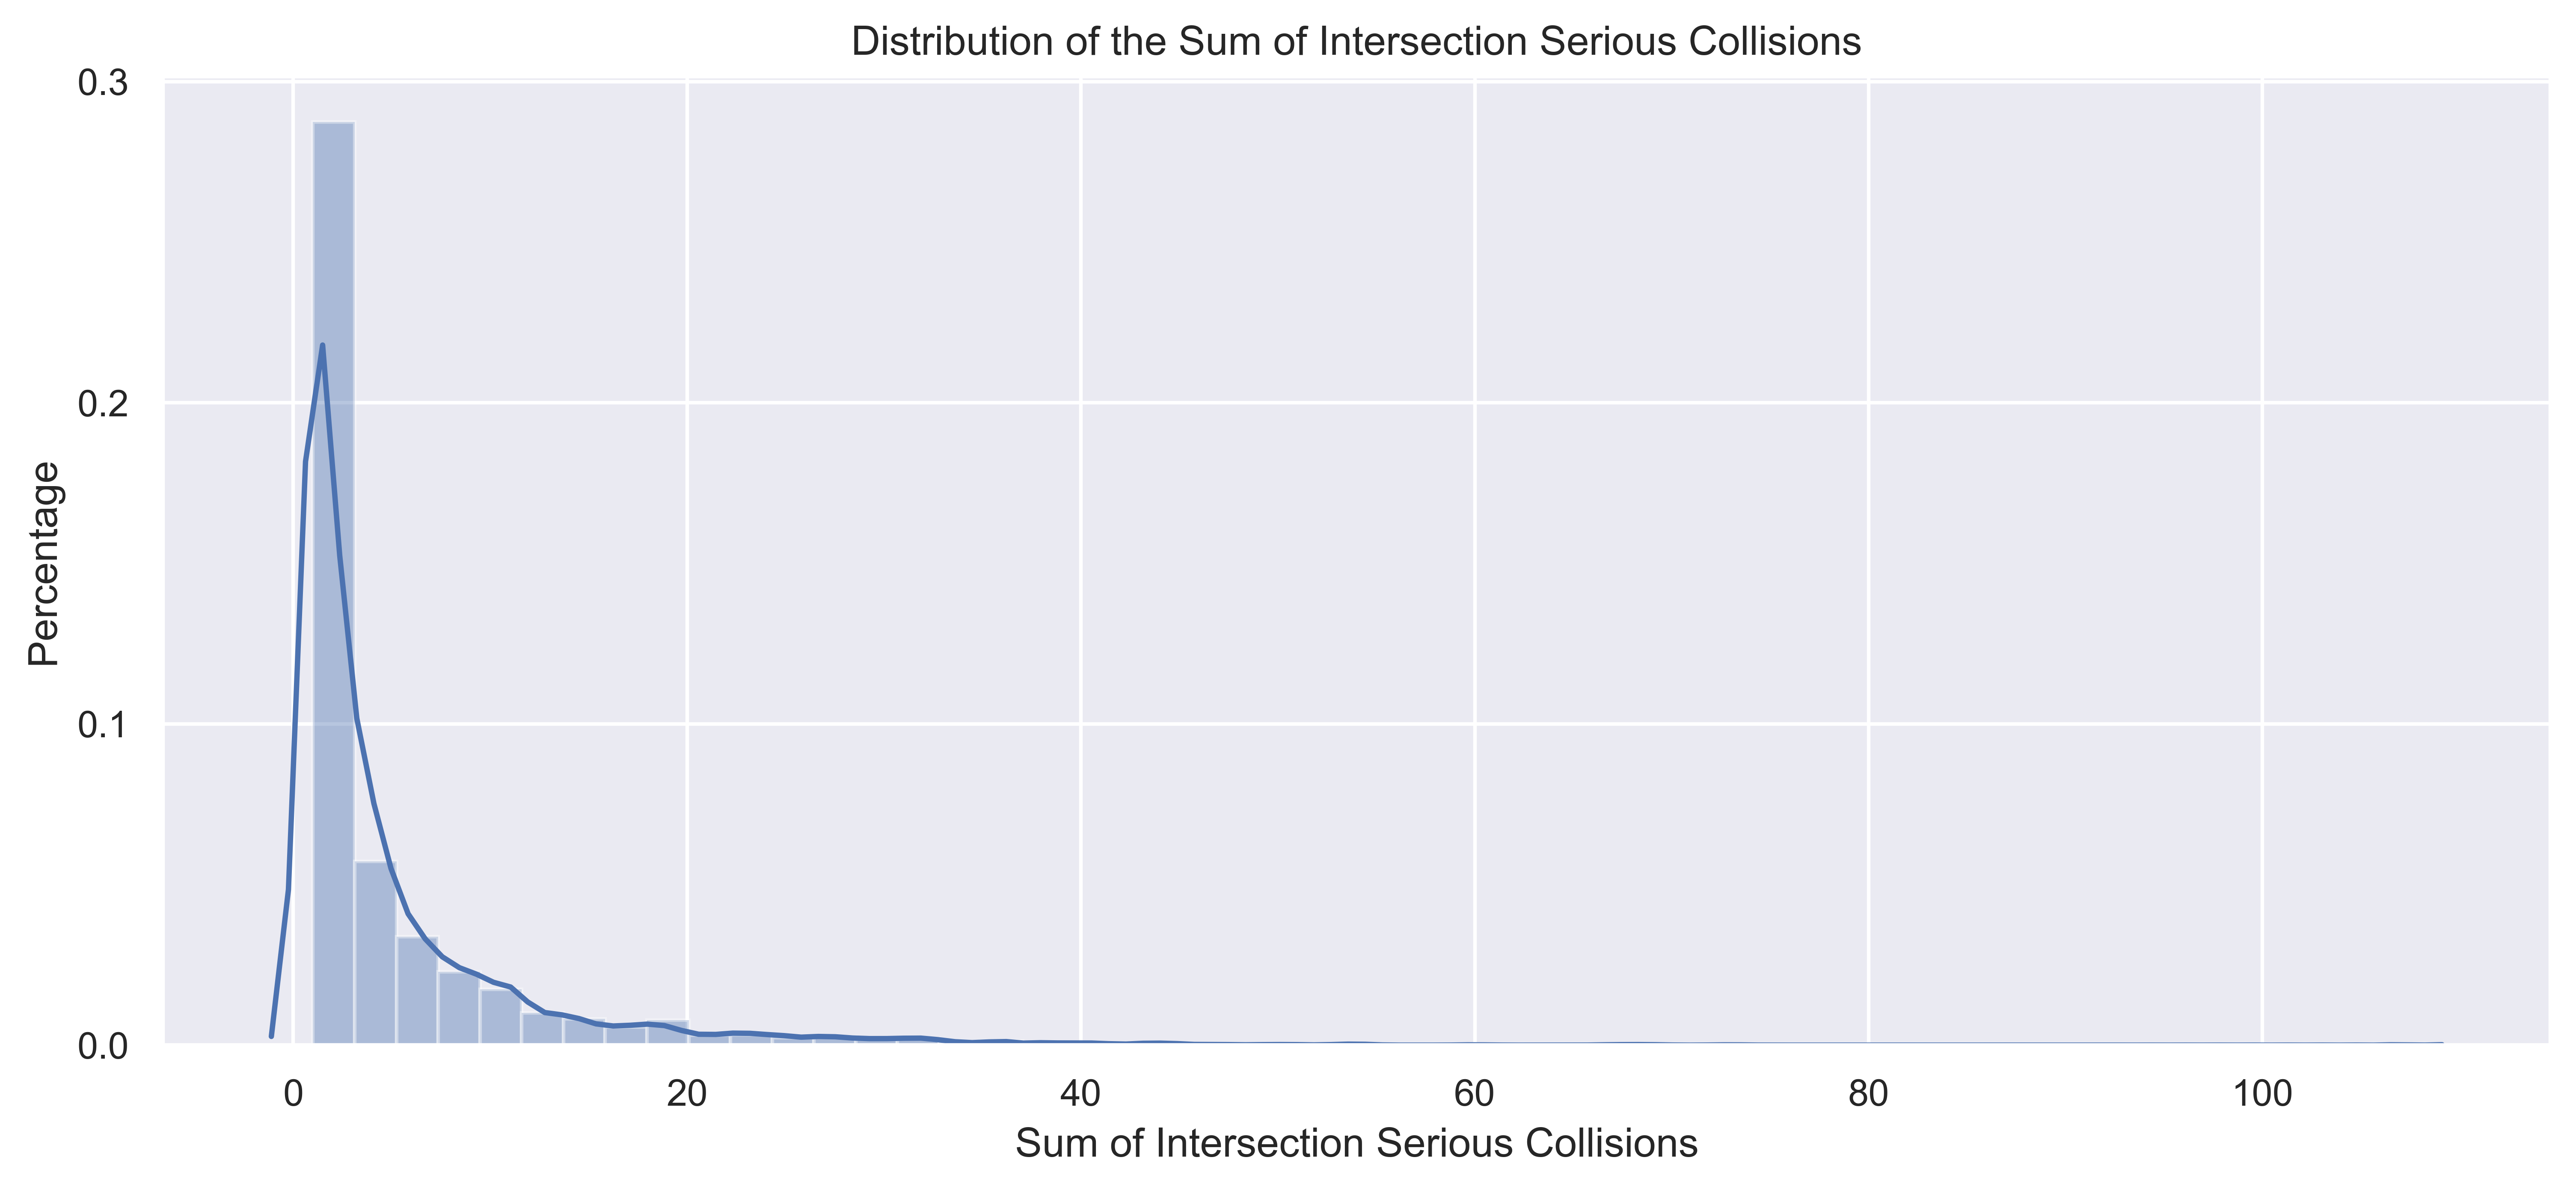

In [48]:
#draw the histgram and PDF curve
plt.figure(figsize=(12,5),dpi=600)

serious_insection_img = sns.distplot(serious_intersetion['Sum'])
serious_insection_img.set(xlabel='Sum of Intersection Serious Collisions',
                          ylabel='Percentage',
                          yticks=[0.0,0.1,0.2,0.3],
                          title='Distribution of the Sum of Intersection Serious Collisions')

plt.show()
serious_insection_img.get_figure().savefig("./output/Distribution of the Sum of Intersection Serious Collisions.png")

In [16]:
#calculate the long tail of the distribution
Sum_more_than_20 = pd.DataFrame(serious_intersetion[serious_intersetion['Sum']>20].sum()).iloc[[1],[0]].values
Sum_all = pd.DataFrame(serious_intersetion.sum()).iloc[[1],[0]].values
percentage_more_than_20 = round((Sum_more_than_20/Sum_all)[0,0]*100,2)
print('{}% of serious collisions at intersections happend at high-risk positions.'.format(percentage_more_than_20))


26.7% of serious collisions at intersections happend at high-risk positions.


In [17]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... 
  - https://repo.anaconda.com/pkgs/main/noarch/noarch::backports.functools_lru_cache-1.6.1-py_0, https://repo.anaconda.com/pkgs/main/noarch/noarch::backports.tempfile-1.0-py_1, https://repo.anaconda.com/pkgs/main/noarch/noarch::backports.weakref-1.0.post1-py_1, https://repo.anaconda.com/pkgs/main/win-64/win-64::conda-env-2.6.0-1
  - defaults/win-64::conda-env-2.6.0-1, https://repo.anaconda.com/pkgs/main/noarch/noarch::backports.functools_lru_cache-1.6.1-py_0, https://repo.anaconda.com/pkgs/main/noarch/noarch::backports.tempfile-1.0-py_1, https://repo.anaconda.com/pkgs/main/noarch/noarch::backports.weakref-1.0.post1-py_1
  - defaults/noarch::backports.functools_lru_cache-1.6.1-py_0, https://repo.anaconda.com/pkgs/main/noarch/noarch::backports.tempfile-1.0-py_1, https://repo.anaconda.com/pkgs/main/noarch/noarch::backports.weakref-1.0.post1-py_1, https://repo.anaconda.com/pkgs/main/win-64/win-64::conda-env-2.6.0-1
  - defaults/noarch::backports.functool

In [18]:
import folium
from folium import plugins

In [19]:
# define the world map centered around Seattle with a low zoom level
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# display world map
#seattle_map

seattle_map.save('./output/seattle_map.html')
# Import the Folium interactive html file

from IPython.display import HTML
HTML('<iframe src=./output/seattle_map.html width=700 height=450></iframe>')

C:\Users\IVY\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [20]:
import webbrowser
# instantiate a mark cluster object for the incidents in the dataframe
top1000 = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(serious_intersetion_top1000.Y, serious_intersetion_top1000.X, serious_intersetion_top1000.Sum):
    folium.Marker(
    location=[lat, lng],
    icon=folium.Icon(color='darkblue', icon_color='white', icon='automobile', prefix='fa'),
    popup=label,
    ).add_to(top1000)

seattle_map.add_child(top1000)

# display map
seattle_map
seattle_map.save("./output/seattletop1000.html")
webbrowser.open("./output/seattletop1000.html")

from IPython.display import HTML
HTML('<iframe src=./output/seattletop1000.html width=700 height=450></iframe>')

### 4.2 Dataset Split
The steps began with dropping missing values from the features since the amount of NAN within tolerance. The dataset scale decreased by 12.8% from 194673 to 169764 items. 

In [66]:
features_original = raw_data[indexes]
print(pd.DataFrame(features_original).isna().sum(),
      '\n','---------------------------')

#drop nan
features_original.dropna(inplace=True)
print(features_original.shape)

SEVERITYCODE          0
INATTENTIONIND        0
UNDERINFL          4884
SPEEDING              0
WEATHER           20172
ROADCOND          20090
LIGHTCOND         18643
WEEKEND               0
ADDRTYPE           1926
COLLISIONTYPE      4904
dtype: int64 
 ---------------------------
(169764, 10)


C:\Users\IVY\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Then I split the inputs and the output into the train and test subset before label encoding to avoid information leakage. 20% of non-null items were separated as test subset, in other words, the train set and test set contained 135811 and 33953 items respectively.

In [59]:
#remain 20% of items to test subset
from sklearn.model_selection import train_test_split

X = features_original.iloc[:,1:]
y = features_original.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (135811, 9) (135811,)
Test (33953, 9) (33953,)


### 4.3 Label Encoding
Because the inputs were all categorical values, I chose the One Hot Encoding technique to convert each category value of the nominal variables into a new column and assigned a 1 or 0 (True/False) value to the column. This has the benefit of not weighing a value improperly but does have the downside of adding more columns to the data set. The number of vectors increased to 29 from 9 original features depending on the number of categories for original features.

In [60]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Ordinal encoding for ordinal variables
#def prepare_inputs(X_train, X_test):
#    ore = OrdinalEncoder() 
#    ore.fit(X_train)
#    X_train_enc = ore.transform(X_train)
#    X_test_enc = ore.transform(X_test)
#    return X_train_enc, X_test_enc

#One hot encoding for nominal variables
def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder() 
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

#Label encoding for one ordinal output
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

print('Train set shape:',X_train_enc.shape)
print('Train set shape:',X_test_enc.shape)

Train set shape: (135811, 29)
Train set shape: (33953, 29)


### 4.4 Oversampling(SMOTE)
Finally, one of the popular oversampling techniques (SMOTE) was implemented to the data, because the output was imbalanced which would influence the predicting outcomes. Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in the dataset in a balanced way. The module worked by generating new instances from existing minority cases that I supplied as input. This implementation increased minority cases from 44556 to 91255 without changing the number of majority cases. The new instances were not just copies of existing minority cases. Instead, the algorithm took samples of the feature space for each target class and its nearest neighbors. The algorithm then generated new examples that combine features of the target case with features of its neighbors. This approach increased the features available to each class and made the samples more general. As a result, the final train set had 182510 items with commensurable cases in binary categories.

In [25]:
!pip install --user imbalanced-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [26]:
import os as os
print(os.sys.path)

['D:\\nb\\ibm_capstone(encoding)', 'C:\\Users\\IVY\\anaconda3\\python37.zip', 'C:\\Users\\IVY\\anaconda3\\DLLs', 'C:\\Users\\IVY\\anaconda3\\lib', 'C:\\Users\\IVY\\anaconda3', '', 'C:\\Users\\IVY\\AppData\\Roaming\\Python\\Python37\\site-packages', 'C:\\Users\\IVY\\anaconda3\\lib\\site-packages', 'C:\\Users\\IVY\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\IVY\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\IVY\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\IVY\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\IVY\\.ipython']


In [61]:
from imblearn.over_sampling import SMOTE
from collections import Counter

#over sampling with the strategy of minority
X_train_sample, y_train_sample = SMOTE(random_state=21).fit_sample(X_train_enc,y_train_enc)

#check the case number of output
print(Counter(y_train_enc))
print(Counter(y_train_sample))

Counter({0: 91255, 1: 44556})
Counter({0: 91255, 1: 91255})


### 4.5 Modelling


In [67]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### 4.5.1 K Nearest Neighbor(KNN)
Calculate the accuracy of KNN with different k from 1 to 99.

In [25]:
#KNN
score=[]
for k in range(1,100):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_sample,y_train_sample)
    y_predict_knn = knn_model.predict(X_test_enc)
    accuracy_knn = metrics.accuracy_score(y_test_enc,y_predict_knn)
    score.append(accuracy_knn)
    print(k,':',accuracy_knn)

1 : 0.6085471092392425
2 : 0.6734014667334256
3 : 0.656760816422702
4 : 0.6438606308720879
5 : 0.5949989691632551
6 : 0.64197567225282
7 : 0.6031278532088475
8 : 0.6427414366918976
9 : 0.6334639059876889
10 : 0.6550820251524165
11 : 0.6347009100815834
12 : 0.6510175831296203
13 : 0.6398845462845698
14 : 0.6579389155597444
15 : 0.635466674520661
16 : 0.6574382234265014
17 : 0.6219479869230996
18 : 0.648366860071275
19 : 0.6174417577239125
20 : 0.64294760404088
21 : 0.6121992165640738
22 : 0.6306659205372132
23 : 0.6247754248520013
24 : 0.6336995258150974
25 : 0.6270138132123818
26 : 0.6342296704267664
27 : 0.6246870674167231
28 : 0.6316083998468471
29 : 0.6244809000677407
30 : 0.6341413129914882
31 : 0.624098017848202
32 : 0.6320207345448119
33 : 0.6268076458633994
34 : 0.6326981415486114
35 : 0.6214472947898566
36 : 0.6312255176273084
37 : 0.6170588755043737
38 : 0.6370276558772421
39 : 0.6212411274408741
40 : 0.6356139369127912
41 : 0.6240096604129237
42 : 0.6325803316349071
43 : 0.62

In [26]:
print(score.index(max(score))+1,':',round(max(score),2)*100,'%')

2 : 67.0 %


Text(0, 0.5, 'Accuracy')

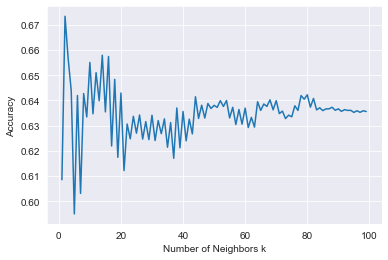

In [27]:
plt.plot(range(1,100),score)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')

The best accuracy was with 72.0% with k= 60.

Select the best k and calculate F1-score and Jaccard score.

In [18]:
#knn_best_k = 2
knn_model_best = KNeighborsClassifier(n_neighbors=2)
knn_model_best.fit(X_train_sample,y_train_sample)
y_predict_knn_best = knn_model_best.predict(X_test_enc)
accuracy_knn_best = metrics.accuracy_score(y_test_enc,y_predict_knn_best)
precision_knn_best = metrics.precision_score(y_test_enc,y_predict_knn_best)
recall_knn_best = metrics.recall_score(y_test_enc,y_predict_knn_best)
f1_score_knn_best = metrics.f1_score(y_test_enc,y_predict_knn_best)
confusion_matrix_knn_best = confusion_matrix(y_test_enc, y_predict_knn_best)

print('Accuracy score :',round(accuracy_knn_best,2)*100,'%')
print('Precision score:',round(precision_knn_best,2)*100,'%')
print('Recall score:',round(recall_knn_best,2)*100,'%') 
print('F1 score:',round(f1_score_knn_best,2)*100,'%')
print('Confusion Matrix:\n',confusion_matrix_knn_best) 


Accuracy score : 67.0 %
Precision score: 50.0 %
Recall score: 21.0 %
F1 score: 30.0 %
Confusion Matrix:
 [[20535  2346]
 [ 8743  2329]]


### 5.7.2 Decision Tree

In [19]:
dtree_model = DecisionTreeClassifier()
param_grid = {'max_depth':[1,2,3,4,5,6,7,8,9,10,15,20],
              'max_features':[1,2,3,4,5,6,7,8,9],
              'random_state':[0,15,20,35,50,80,100,150,180,200],
              'criterion':['gini','entropy']}
dtree_grid_search = GridSearchCV(dtree_model,param_grid=param_grid,cv=10)
dtree_grid_search.fit(X_train_sample,y_train_sample)
print("Best score: {}".format(dtree_grid_search.best_score_))
print("Best params: {}".format(dtree_grid_search.best_params_))

Best score: 0.6501404834638091
Best params: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 8, 'random_state': 180}


In [35]:
dtree_best = DecisionTreeClassifier(criterion='entropy',max_depth=20,max_features=8,random_state=180)
dtree_best.fit(X_train_sample,y_train_sample)
y_predict_dtree = dtree_best.predict(X_test_enc)
accuracy_dtree = metrics.accuracy_score(y_test_enc,y_predict_dtree)
precision_dtree = metrics.precision_score(y_test_enc,y_predict_dtree)
recall_dtree = metrics.recall_score(y_test_enc,y_predict_dtree)
f1_score_dtree = metrics.f1_score(y_test_enc,y_predict_dtree)
confusion_matrix_dtree = confusion_matrix(y_test_enc, y_predict_dtree)

print('Accuracy score :',round(accuracy_dtree,4)*100,'%')
print('Precision score:',round(precision_dtree,4)*100,'%')
print('Recall score:',round(recall_dtree,4)*100,'%') 
print('F1 score:',round(f1_score_dtree,4)*100,'%')
print('Confusion Matrix:\n',confusion_matrix_dtree)


Accuracy score : 62.89 %
Precision score: 45.53 %
Recall score: 70.32000000000001 %
F1 score: 55.279999999999994 %
Confusion Matrix:
 [[13568  9313]
 [ 3286  7786]]


### 5.7.3 Support Vector Machine(SVM)

In [26]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_sample,y_train_sample)
y_predict_svm = svm_model.predict(X_test_enc)

In [34]:
accuracy_svm = metrics.accuracy_score(y_test_enc,y_predict_svm)
precision_svm = metrics.precision_score(y_test_enc,y_predict_svm)
recall_svm = metrics.recall_score(y_test_enc,y_predict_svm)
f1_score_svm = metrics.f1_score(y_test_enc,y_predict_svm)
confusion_matrix_svm = confusion_matrix(y_test_enc, y_predict_svm)

print('Accuracy score :',round(accuracy_svm,4)*100,'%')
print('Precision score:',round(precision_svm,4)*100,'%')
print('Recall score:',round(recall_svm,4)*100,'%') 
print('F1 score:',round(f1_score_svm,4)*100,'%')
print('Confusion Matrix:\n',confusion_matrix_svm)


Accuracy score : 63.0 %
Precision score: 45.68 %
Recall score: 71.17999999999999 %
F1 score: 55.65 %
Confusion Matrix:
 [[13510  9371]
 [ 3191  7881]]


### 5.7.4 Logistic Regression

In [28]:
lg_model = LogisticRegression()
lg_model.fit(X_train_sample,y_train_sample)
y_predict_lg = lg_model.predict(X_test_enc)

In [33]:
accuracy_lg = metrics.accuracy_score(y_test_enc,y_predict_lg)
precision_lg = metrics.precision_score(y_test_enc,y_predict_lg)
recall_lg = metrics.recall_score(y_test_enc,y_predict_lg)
f1_score_lg = metrics.f1_score(y_test_enc,y_predict_lg)
confusion_matrix_lg = confusion_matrix(y_test_enc, y_predict_lg)

print('Accuracy score :',round(accuracy_lg,4)*100,'%')
print('Precision score:',round(precision_lg,4)*100,'%')
print('Recall score:',round(recall_lg,4)*100,'%') 
print('F1 score:',round(f1_score_lg,4)*100,'%')
print('Confusion Matrix:\n',confusion_matrix_lg)


Accuracy score : 62.35000000000001 %
Precision score: 45.14 %
Recall score: 71.8 %
F1 score: 55.44 %
Confusion Matrix:
 [[13221  9660]
 [ 3122  7950]]


### 5.7.5 Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rdf_model = RandomForestClassifier(n_estimators=100,random_state=35)
rdf_model.fit(X_train_sample, y_train_sample)
y_predict_rdf=rdf_model.predict(X_test_enc)


In [64]:
accuracy_rdf= metrics.accuracy_score(y_test_enc,y_predict_rdf)
precision_rdf= metrics.precision_score(y_test_enc,y_predict_rdf)
recall_rdf= metrics.recall_score(y_test_enc,y_predict_rdf)
f1_score_rdf= metrics.f1_score(y_test_enc,y_predict_rdf)
confusion_matrix_rdf = confusion_matrix(y_test_enc, y_predict_rdf)

print('Accuracy score :',round(accuracy_rdf,4)*100,'%')
print('Precision score:',round(precision_rdf,4)*100,'%')
print('Recall score:',round(recall_rdf,4)*100,'%') 
print('F1 score:',round(f1_score_rdf,4)*100,'%')
print('Confusion Matrix:\n',confusion_matrix_rdf) 

Accuracy score : 62.57 %
Precision score: 45.48 %
Recall score: 70.73 %
F1 score: 55.36 %
Confusion Matrix:
 [[13367  9447]
 [ 3260  7879]]


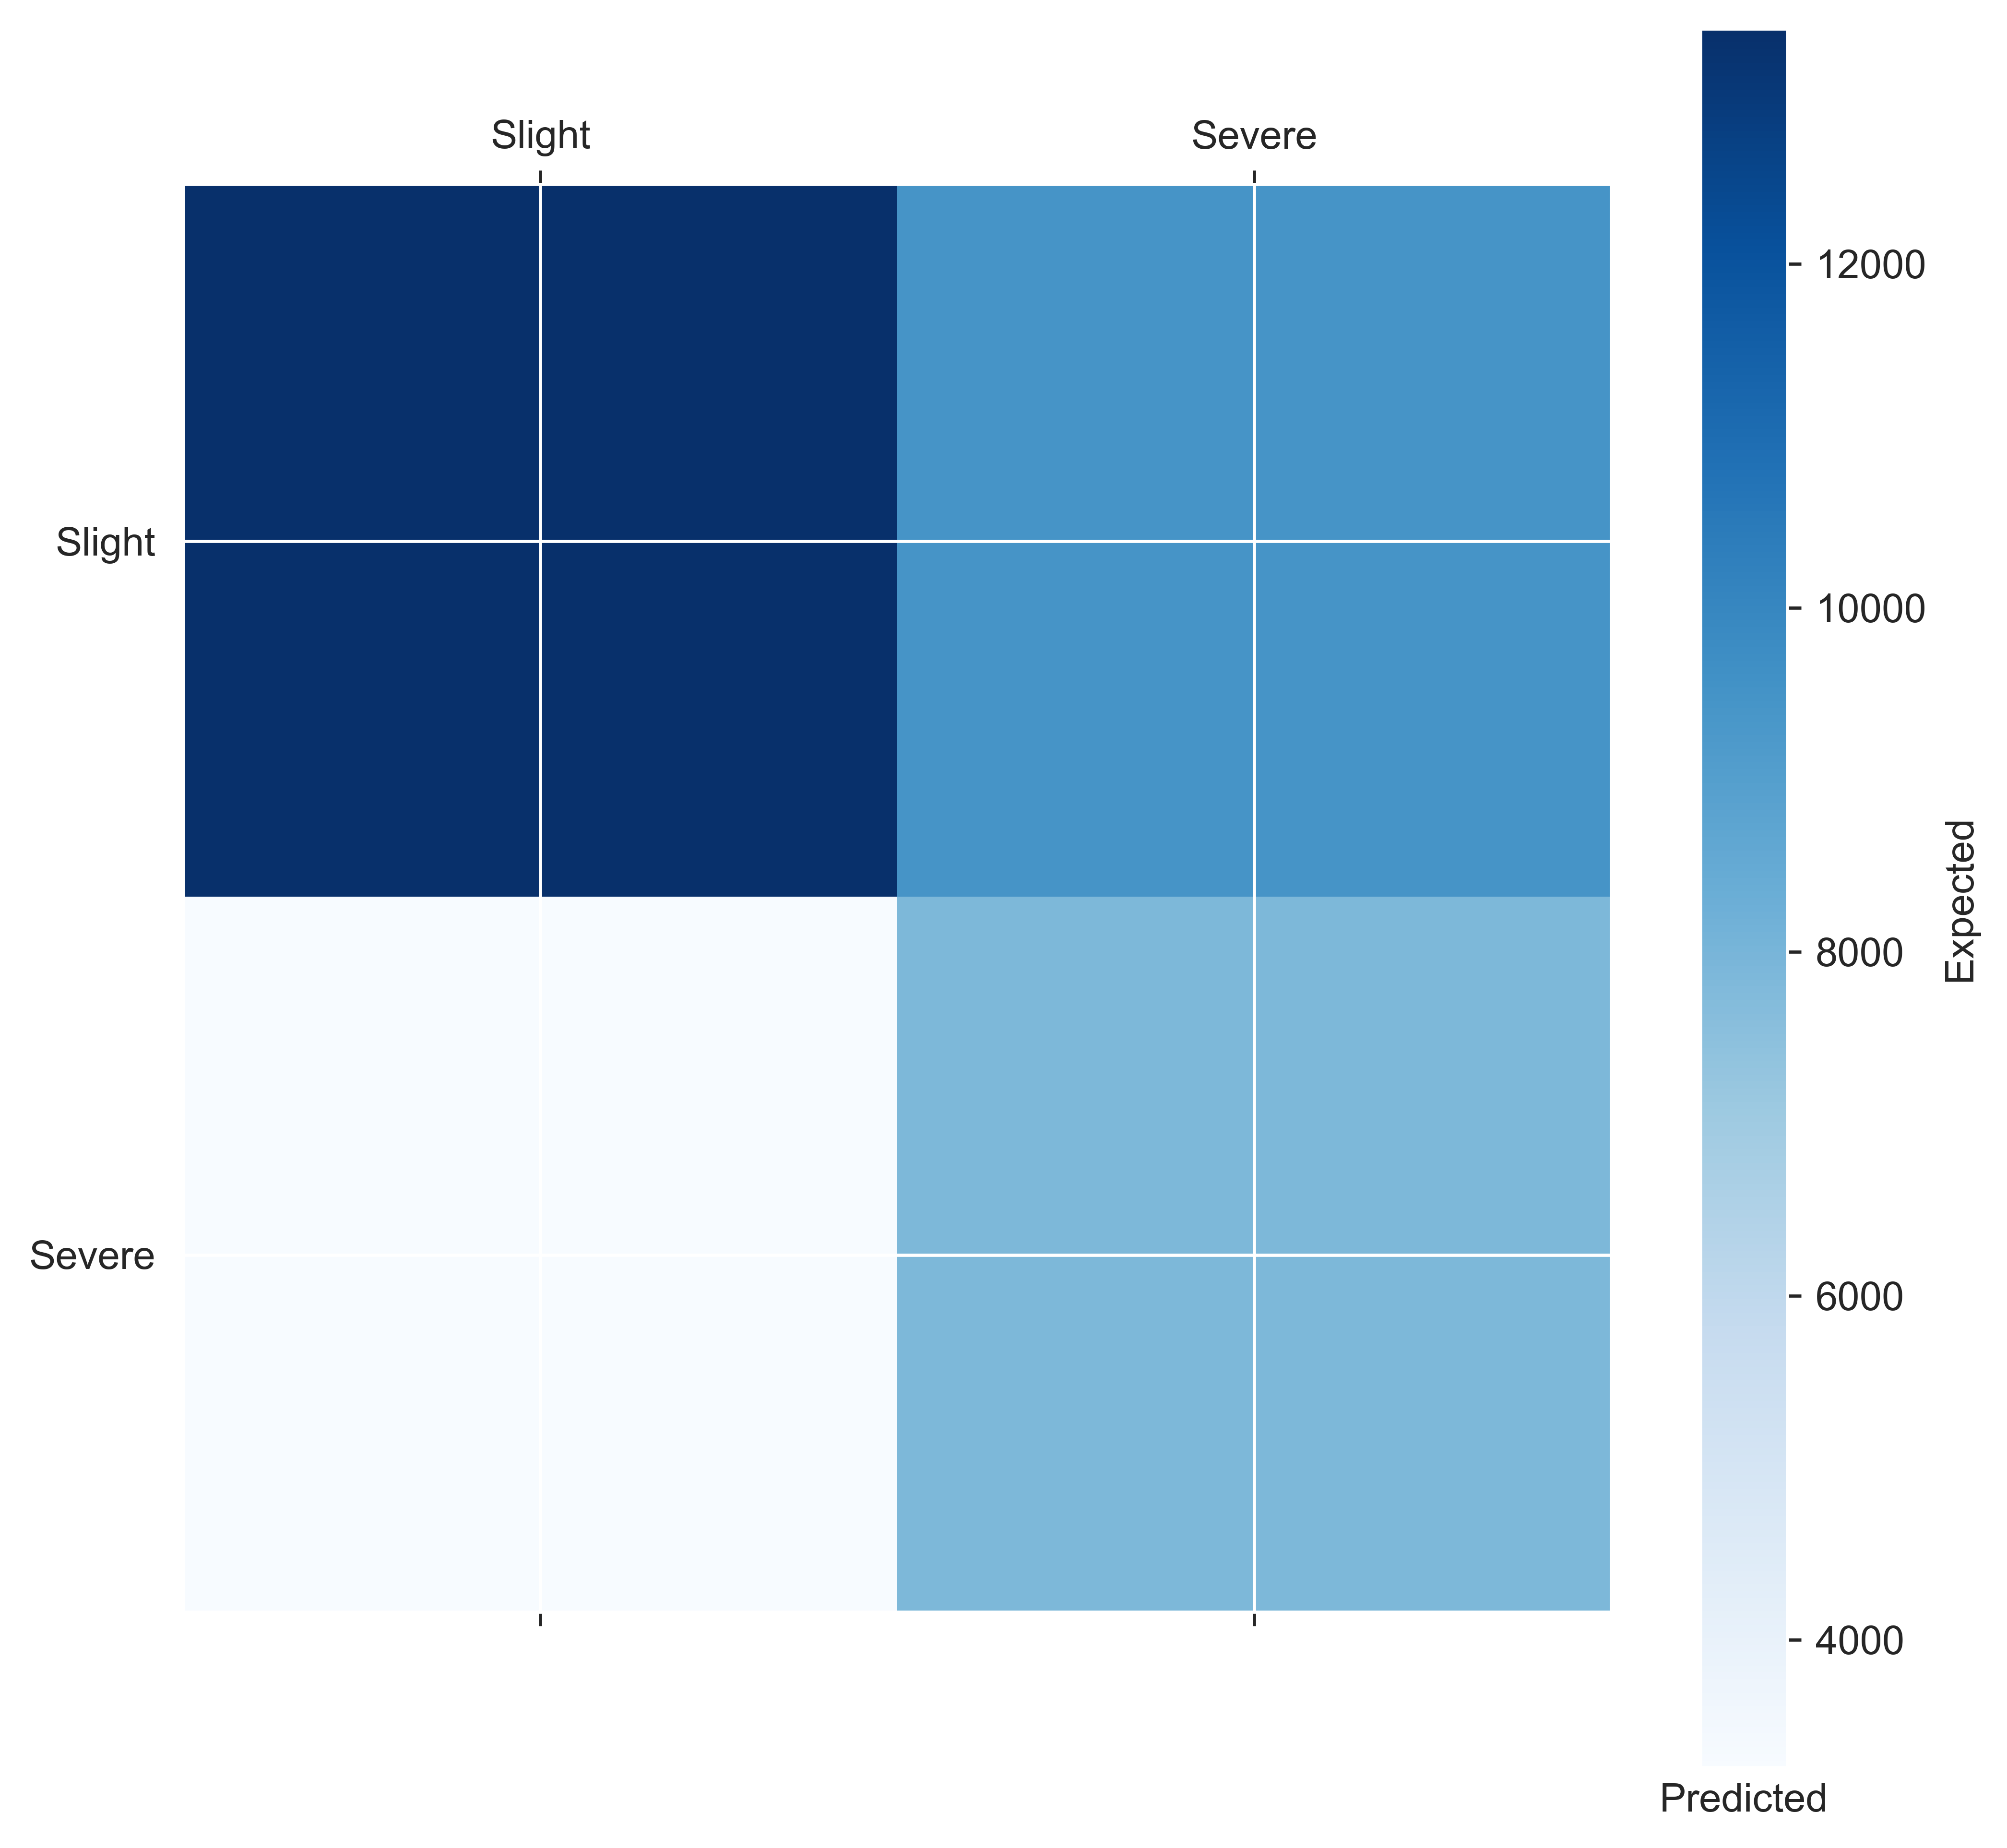

In [65]:
labels1 = ['Slight', 'Severe']
fig_score = plt.figure(figsize = (8,8),dpi=600)
ax = fig_score.add_subplot(111)
cax = ax.matshow(confusion_matrix_rdf, cmap=plt.cm.Blues)
fig.colorbar(cax,ax=ax)
ax.set_xticklabels([''] + labels1)
ax.set_yticklabels([''] + labels1)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
ax.get_figure().savefig("./output/Confusion Matrix of Random Forest Model.png")

## 7. Discussion

I was able to achieve ~65% accuracy in the classification problem. However, there was still significant misclassification by the models in this study. I think the models could use more improvements to reduce false positive predictions. In further research, I will try to adjust the hyper-parameter of existed models or apply new models, such as the Xgboost model.

Moreover, models in this study mainly focused on categorical features. I will try to combine some numerical variables into predictive models to boost accuracy. Before the involvement of numerical variables into models, I need to preprocess them with standard scale transformation.

## 8. Conclusion

Firstly, governments should update facilities to warn and protect drivers and walkers, because natural factors surpassed human factors on the impacts of car accidents. Bad circumstances properly contribute to casualties in road accidents. For example, the construction of speed bumps at crossings may decrease the fatal accident rate. If governments are under a financial strain, they can concentrate on high-risk regions first from the map from this study.

Secondly, insurance companies can customize service according to this study. They could set higher vehicle insurance premiums on people who have a behavior record of drunk driving, under drug driving, or speeding driving. The optimal scheme can help insurance companies reduce risks and save money.

Thirdly, vehicle manufacturers should organize some research about improving the mechanical structure of cars because the front and end part of cars are vulnerable. The innovation of car body materials or buffer structures could alleviate hurts on passengers.
